In [3]:
### INTEGRATED ANALYSIS 1b: INTRAEPITHELIAL TILs (RAW COUNTS) VS CLINICAL VARIABLES ################

# Import libraries to work 
import numpy as np  # Library for numerical computations and arrays
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for creating visualizations and plots
import os  # Library for interacting with the operating system (files, directories)

# I read the file containing the samples with all type of data available (complete or partial): gold standard results+genomic+clinical+TILs
path='/home/vant/TFM/Final_db/Samples_alltypedata_annotated.xlsx'  
df=pd.read_excel(path)
# See dataframe characteristics (columns names, type of values and number of null values in each column)
print(df.info()) 

######## Firstly we reclassify misclassified samples according the predictor  #######################

# Change the values to 'MMRp' for samples 'LP20', 'LP26', and 'MDA15'
# We use .loc[] to access specific rows where 'ID_CNIO' matches one of the specified samples
df.loc[df['ID_CNIO'].isin(['LP20', 'LP26', 'MDA15']), 'MMR_final_status'] = 'MMRp'

# Change the values to 'MMRd' for samples 'MDA26' and 'OVE28'. 'OVE28' is not misclassified according Diego's previous work
df.loc[df['ID_CNIO'].isin(['MDA26']), 'MMR_final_status'] = 'MMRd'

# Eliminate mixed case
df=df[df['ID_CNIO']!='RVB3']

 # Create a new DataFrame without the first two rows that only contain the descriptive and coding information
df = df.iloc[2:].reset_index(drop=True)

##### FACILITATE THE INTERPRETATION OF HISTOLOGY,FIGOL,GRADE AND RESIDUALa COLUMNS ##############

# Filter the DataFrame to keep only rows where 'TILs_CNIO_info' is not 'NO' and is not 'YES_only_tu' (Keep rows with complete info)
df= df[(df['TILs_CNIO_info'] != 'NO') & (df['TILs_CNIO_info']!='YES_only_tu')]

# See the length
print("Length of the dataframe with samples that have TILs CNIO information:",len(df))

# Mapping dictionary for HISTOLOGY
category_mapping = {0: 'EOC', 1: 'CCOC', 2: 'Mixed', 3: 'Others'}

# Replace values in HISTOLOGY
df['HISTOLOGY'] = df['HISTOLOGY'].map(category_mapping)

# Mapping representative categories for FIGOL
df.loc[:,'FIGOL'] = df['FIGOL'].map({0: 'Localized', 1: 'Advanced'})

# Mapping GRADE values using .loc and convert it to a categorical type with a specific order
df.loc[:, 'GRADE'] = df['GRADE'].map({
    1: 'Well differentiated', 
    2: 'Moderately differentiated', 
    3: 'Poorly differentiated'
})
# Mapping representative categories for RESIDUALa
df.loc[:, 'RESIDUALa'] = df['RESIDUALa'].map({0: 'No', 1: 'Yes'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID_CNIO                    169 non-null    object
 1   ID_ORIGINAL                165 non-null    object
 2   ID_ORIGINAL_NHC_BBANK      149 non-null    object
 3   HISTOLOGY                  169 non-null    object
 4   HISTOLOGY_DETAIL           169 non-null    object
 5   AGE                        169 non-null    object
 6   GRADE                      134 non-null    object
 7   FIGO                       163 non-null    object
 8   FIGOL                      163 non-null    object
 9   FIGOa                      163 non-null    object
 10  NEOADJUVANT_TREATMENT      113 non-null    object
 11  ADJUVANT_TREATMENT         154 non-null    object
 12  TYPE_ADJUVANT              123 non-null    object
 13  OTHER_ADJ_TREAT            9 non-null      object
 14  RESIDUAL  

In [4]:
### Necessary transformations and filtering to obtain dataframes of work ###############

### Dataframe with all samples (EOC+CC) is df. I filter to obtain one with only EOC samples and another one with only CC samples
df_eoc = df[df['HISTOLOGY'] == 'EOC']
df_cc = df[df['HISTOLOGY'] == 'CCOC']
print(f"Number of EOC+CC samples with complete TILs raw counts: {len(df)}")
print(f"Number of EOC samples with TILs raw counts: {len(df_eoc)}")
print(f"Number of CC samples with TILs raw counts: {len(df_cc)}")

### Dataframes with all samples (EOC+CC), EOC samples and CC samples including only MMRp cases 
df_all_mmrp=df[df['MMR_final_status']=='MMRp']
df_eoc_mmrp=df[(df['HISTOLOGY']=='EOC') & (df['MMR_final_status']=='MMRp')]
df_cc_mmrp=df[(df['HISTOLOGY']=='CCOC') & (df['MMR_final_status']=='MMRp')]

# Verify the number of samples in every category ALL MMRp, EOC MMRp and CC MMRp
print("Number of MMRp samples with TILs raw counts:", len(df_all_mmrp))
print("Number of MMRp EOC samples with TILs raw counts :", len(df_eoc_mmrp))
print("Number of MMRp CC samples with TILs raw counts:", len(df_cc_mmrp))

Number of EOC+CC samples with complete TILs raw counts: 156
Number of EOC samples with TILs raw counts: 84
Number of CC samples with TILs raw counts: 72
Number of MMRp samples with TILs raw counts: 141
Number of MMRp EOC samples with TILs raw counts : 74
Number of MMRp CC samples with TILs raw counts: 67


Statistics for TILs_raw_ep in EOC:
  FIGOL: Localized
    N: 71
    Mean: 10.90
    Median: 2.00
    Q1: 1.00
    Q3: 8.50
    SD: 21.83
  FIGOL: Advanced
    N: 12
    Mean: 20.50
    Median: 3.50
    Q1: 2.00
    Q3: 15.00
    SD: 45.34
Statistics for TILs_raw_ep in CCOC:
  FIGOL: Localized
    N: 42
    Mean: 7.81
    Median: 1.00
    Q1: 0.00
    Q3: 6.75
    SD: 15.78
  FIGOL: Advanced
    N: 27
    Mean: 24.37
    Median: 4.00
    Q1: 1.50
    Q3: 11.50
    SD: 47.81
Statistics for TILs_raw_tu in EOC:
  FIGOL: Localized
    N: 71
    Mean: 32.15
    Median: 14.00
    Q1: 5.50
    Q3: 33.00
    SD: 45.49
  FIGOL: Advanced
    N: 12
    Mean: 36.42
    Median: 6.50
    Q1: 2.75
    Q3: 24.50
    SD: 78.20
Statistics for TILs_raw_tu in CCOC:
  FIGOL: Localized
    N: 42
    Mean: 38.12
    Median: 5.00
    Q1: 2.00
    Q3: 32.75
    SD: 68.36
  FIGOL: Advanced
    N: 27
    Mean: 68.33
    Median: 18.00
    Q1: 6.00
    Q3: 100.50
    SD: 95.99
Outliers for TILs_raw_ep in EOC:
LP3,5

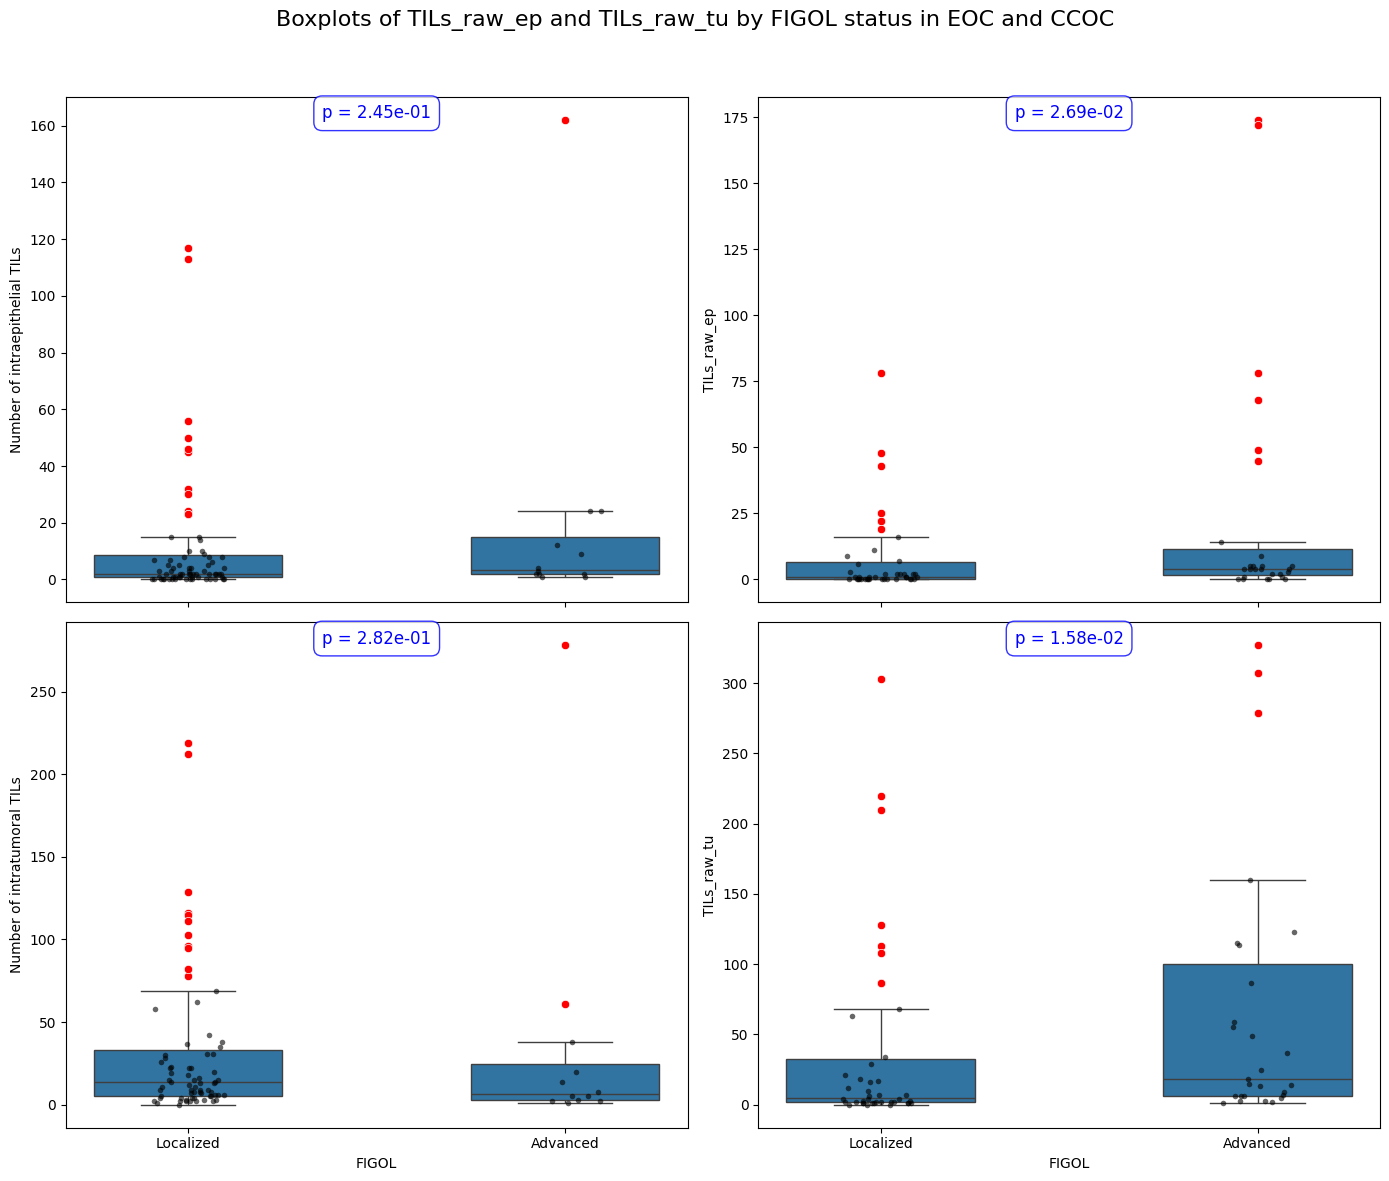

In [5]:
### Analyze  statistics and distribution of TILs_raw_ep and TILs_raw_tu in each FIGOL category by histotype #####

# Import necessary libraries
import seaborn as sns  # Library for statistical data visualization
from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
from scipy.stats import levene  # Function to test equality of variances (Levene's test)
from scipy.stats import ttest_ind  # Function for independent two-sample t-test
from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

def analyze_and_plot_tils_by_histotype_and_figure_status(df_eoc, df_cc, output_folder, output_file):
    # Function to prepare data
    def prepare_data(df):
        df = df.copy()
        # Filter out rows with NaN values in the FIGOL column
        df = df[df['FIGOL'].notna()]
        df['TILs_raw_ep'] = pd.to_numeric(df['TILs_raw_ep'], errors='coerce')
        df['TILs_raw_tu'] = pd.to_numeric(df['TILs_raw_tu'], errors='coerce')
        return df.dropna(subset=['TILs_raw_ep', 'TILs_raw_tu'])

    df_eoc = prepare_data(df_eoc)
    df_cc = prepare_data(df_cc)

    # Function to filter outliers
    def filter_outliers(df, variable):
        categories = df['FIGOL'].unique()
        non_outliers = pd.DataFrame()
        outliers = pd.DataFrame()
        for category in categories:
            category_data = df[df['FIGOL'] == category]
            Q1 = category_data[variable].quantile(0.25)
            Q3 = category_data[variable].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            filtered = category_data[
                (category_data[variable] >= lower_bound) &
                (category_data[variable] <= upper_bound)
            ]
            outlier_data = category_data[
                (category_data[variable] < lower_bound) |
                (category_data[variable] > upper_bound)
            ]
            non_outliers = pd.concat([non_outliers, filtered])
            outliers = pd.concat([outliers, outlier_data])
        return non_outliers, outliers

    # Function to print statistics
    def print_statistics(df, variable, histotype):
        print(f"Statistics for {variable} in {histotype}:")
        for category in df['FIGOL'].unique():
            category_data = df[df['FIGOL'] == category][variable]
            count = category_data.count()
            mean = category_data.mean()
            median = category_data.median()
            Q1 = category_data.quantile(0.25)
            Q3 = category_data.quantile(0.75)
            sd = category_data.std()
            print(f"  FIGOL: {category}")
            print(f"    N: {count}")
            print(f"    Mean: {mean:.2f}")
            print(f"    Median: {median:.2f}")
            print(f"    Q1: {Q1:.2f}")
            print(f"    Q3: {Q3:.2f}")
            print(f"    SD: {sd:.2f}")

    # Function to print outliers
    def print_outliers_info(df, variable, histotype):
        _, outliers = filter_outliers(df, variable)
        print(f"Outliers for {variable} in {histotype}:")
        if not outliers.empty:
            for _, row in outliers.iterrows():
                print(f"{row['ID_CNIO']},{row[variable]},{row['FIGOL']}")
        else:
            print("  No outliers found.")

    # Function to annotate outliers (only points in red, no label)
    def annotate_outliers(ax, df, variable):
        _, outliers = filter_outliers(df, variable)
        sns.scatterplot(
            x='FIGOL', y=variable, data=outliers,
            ax=ax, color='red',
        )

    # Function to annotate p-value in plots (with a blue box)
    def annotate_pvalue(ax, df, variable):
        categories = df['FIGOL'].unique()
        if len(categories) == 2:
            group1 = df[df['FIGOL'] == categories[0]][variable]
            group2 = df[df['FIGOL'] == categories[1]][variable]

            # Normality and variance tests
            shapiro1 = shapiro(group1)
            shapiro2 = shapiro(group2)
            levene_test = levene(group1, group2)

            # Statistical test selection
            if shapiro1.pvalue > 0.05 and shapiro2.pvalue > 0.05 and levene_test.pvalue > 0.05:
                test_stat, p_value = ttest_ind(group1, group2).statistic, ttest_ind(group1, group2).pvalue
            else:
                test_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided').statistic, \
                                     mannwhitneyu(group1, group2, alternative='two-sided').pvalue

            # Annotate the p-value and statistic
            ax.text(
                x=0.5, y=0.95,
                s=f"p = {p_value:.2e}",
                horizontalalignment='center', verticalalignment='bottom',
                fontsize=12, color='blue',
                transform=ax.transAxes,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='blue', boxstyle='round,pad=0.5')
            )

    # Print statistics for both histotypes
    print_statistics(df_eoc, 'TILs_raw_ep', 'EOC')
    print_statistics(df_cc, 'TILs_raw_ep', 'CCOC')
    print_statistics(df_eoc, 'TILs_raw_tu', 'EOC')
    print_statistics(df_cc, 'TILs_raw_tu', 'CCOC')

    # Create figure with 2 rows and 2 columns
    fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharex=True)

    # EOC plot for TILs_raw_ep (top left)
    print_outliers_info(df_eoc, 'TILs_raw_ep', 'EOC')
    df_eoc_filtered, _ = filter_outliers(df_eoc, 'TILs_raw_ep')
    sns.boxplot(
        x='FIGOL', y='TILs_raw_ep', data=df_eoc,
        ax=axes[0, 0], width=0.5, showfliers=False
    )
    sns.stripplot(
        x='FIGOL', y='TILs_raw_ep', data=df_eoc_filtered,
        ax=axes[0, 0], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[0, 0], df_eoc, 'TILs_raw_ep')
    annotate_pvalue(axes[0, 0], df_eoc, 'TILs_raw_ep')
    axes[0, 0].set_ylabel('Number of intraepithelial TILs')

    # CCOC plot for TILs_raw_ep (top right)
    print_outliers_info(df_cc, 'TILs_raw_ep', 'CCOC')
    df_cc_filtered, _ = filter_outliers(df_cc, 'TILs_raw_ep')
    sns.boxplot(
        x='FIGOL', y='TILs_raw_ep', data=df_cc,
        ax=axes[0, 1], width=0.5, showfliers=False
    )
    sns.stripplot(
        x='FIGOL', y='TILs_raw_ep', data=df_cc_filtered,
        ax=axes[0, 1], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[0, 1], df_cc, 'TILs_raw_ep')
    annotate_pvalue(axes[0, 1], df_cc, 'TILs_raw_ep')

    # EOC plot for TILs_raw_tu (bottom left)
    print_outliers_info(df_eoc, 'TILs_raw_tu', 'EOC')
    df_eoc_filtered, _ = filter_outliers(df_eoc, 'TILs_raw_tu')
    sns.boxplot(
        x='FIGOL', y='TILs_raw_tu', data=df_eoc,
        ax=axes[1, 0], width=0.5, showfliers=False
    )
    sns.stripplot(
        x='FIGOL', y='TILs_raw_tu', data=df_eoc_filtered,
        ax=axes[1, 0], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[1, 0], df_eoc, 'TILs_raw_tu')
    annotate_pvalue(axes[1, 0], df_eoc, 'TILs_raw_tu')
    axes[1, 0].set_ylabel('Number of intratumoral TILs')

    # CCOC plot for TILs_raw_tu (bottom right)
    print_outliers_info(df_cc, 'TILs_raw_tu', 'CCOC')
    df_cc_filtered, _ = filter_outliers(df_cc, 'TILs_raw_tu')
    sns.boxplot(
        x='FIGOL', y='TILs_raw_tu', data=df_cc,
        ax=axes[1, 1], width=0.5, showfliers=False
    )
    sns.stripplot(
        x='FIGOL', y='TILs_raw_tu', data=df_cc_filtered,
        ax=axes[1, 1], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[1, 1], df_cc, 'TILs_raw_tu')
    annotate_pvalue(axes[1, 1], df_cc, 'TILs_raw_tu')

    # Final adjustments
    fig.suptitle('Boxplots of TILs_raw_ep and TILs_raw_tu by FIGOL status in EOC and CCOC', fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])

    # Save plot
    os.makedirs(output_folder, exist_ok=True)
    plt.savefig(f'{output_folder}/{output_file}', format='png', bbox_inches='tight')
    plt.show()

# Use
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_EOC_CCOC_TILs_raw_by_FIGOL_status.png'

# Call the function
analyze_and_plot_tils_by_histotype_and_figure_status(df_eoc, df_cc, output_folder, output_file)


Statistics for TILs_raw_ep by FIGOL:

FIGOL Category: Localized
Mean: 9.75, Median: 2.00, Std Dev: 19.78, Count: 113, Q1:0.0, Q3:8.0

FIGOL Category: Advanced
Mean: 23.18, Median: 4.00, Std Dev: 46.50, Count: 39, Q1:2.0, Q3:13.0
Outliers for TILs_raw_ep:
LP3,56, Localized
LP16,32, Localized
LP32,45, Localized
LP33,117, Localized
LP88,22, Localized
MDA2,23, Localized
MDA9,25, Localized
MDA11,24, Localized
MDA25,23, Localized
MDA27,113, Localized
MDA46,48, Localized
MDA47,50, Localized
MDA50,78, Localized
MDA51_T1_CCC,43, Localized
OVE19,22, Localized
OVE28,23, Localized
OVE93,46, Localized
RVB2,30, Localized
LP48,162, Advanced
LP84,78, Advanced
MDA42,68, Advanced
MDA44,174, Advanced
OVE72,49, Advanced
OVE84,172, Advanced
OVE86,45, Advanced

Statistics for TILs_raw_tu by FIGOL:

FIGOL Category: Localized
Mean: 34.37, Median: 11.00, Std Dev: 54.89, Count: 113, Q1:3.0, Q3:34.0

FIGOL Category: Advanced
Mean: 58.51, Median: 14.00, Std Dev: 91.09, Count: 39, Q1:5.0, Q3:60.0
Outliers for TIL

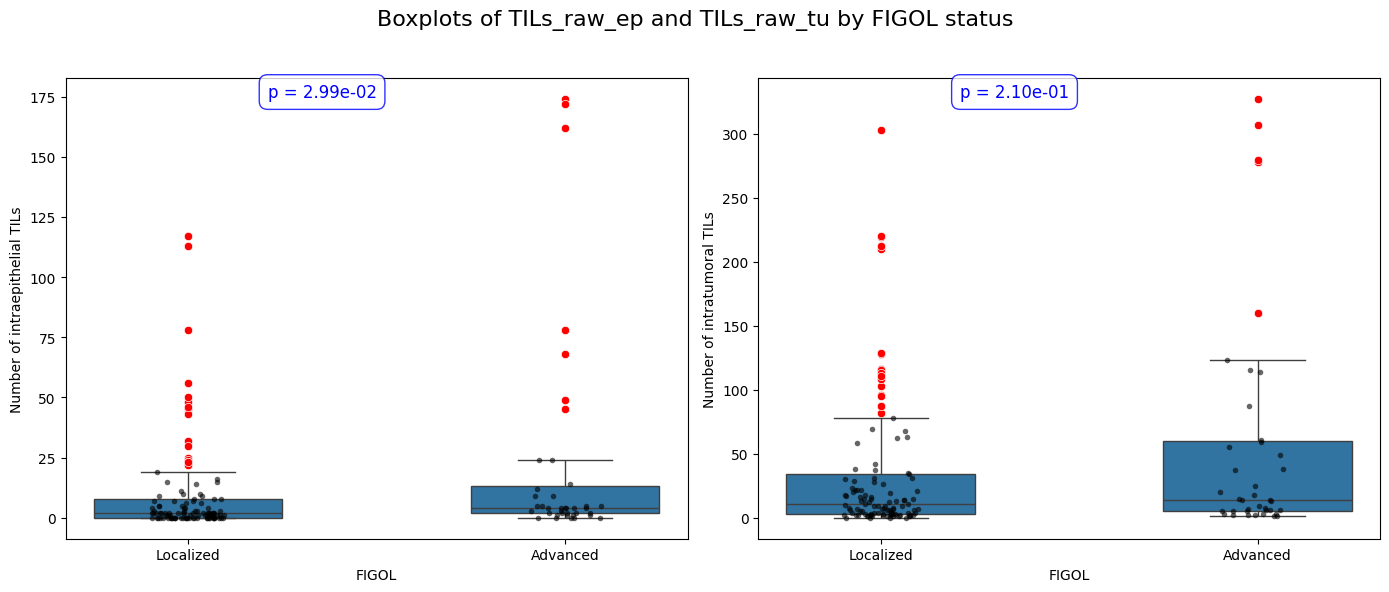

In [6]:
### Analyze statistics and distribution of TILs_raw_ep and TILs_raw_tu in each FIGOL category in EOC+CC #####


# Uncomment to import the libraries if not done previously 
# import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

def analyze_and_plot_tils_by_figure_status(df, output_folder, output_file):
    # Function to prepare data
    def prepare_data(df):
        df = df.copy()
        # Filter out rows with NaN values in the FIGOL column
        df = df[df['FIGOL'].notna()]
        df['TILs_raw_ep'] = pd.to_numeric(df['TILs_raw_ep'], errors='coerce')
        df['TILs_raw_tu'] = pd.to_numeric(df['TILs_raw_tu'], errors='coerce')
        return df.dropna(subset=['TILs_raw_ep', 'TILs_raw_tu'])

    df = prepare_data(df)

    # Function to filter outliers
    def filter_outliers(df, variable):
        categories = df['FIGOL'].unique()
        non_outliers = pd.DataFrame()
        outliers = pd.DataFrame()
        for category in categories:
            category_data = df[df['FIGOL'] == category]
            Q1 = category_data[variable].quantile(0.25)
            Q3 = category_data[variable].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            filtered = category_data[
                (category_data[variable] >= lower_bound) &
                (category_data[variable] <= upper_bound)
            ]
            outlier_data = category_data[
                (category_data[variable] < lower_bound) |
                (category_data[variable] > upper_bound)
            ]
            non_outliers = pd.concat([non_outliers, filtered])
            outliers = pd.concat([outliers, outlier_data])
        return non_outliers, outliers

    # Function to print outliers
    def print_outliers_info(df, variable):
        _, outliers = filter_outliers(df, variable)
        if not outliers.empty:
            print(f"Outliers for {variable}:")
            for _, row in outliers.iterrows():
                print(f"{row['ID_CNIO']},{row[variable]}, {row['FIGOL']}")
        else:
            print(f"No outliers found for {variable}.")

    # Function to print statistics for each group
    def print_statistics(df, variable):
        print(f"\nStatistics for {variable} by FIGOL:")
        for category in df['FIGOL'].unique():
            category_data = df[df['FIGOL'] == category][variable]
            mean = category_data.mean()
            median = category_data.median()
            std = category_data.std()
            Q1 = category_data.quantile(0.25)
            Q3 = category_data.quantile(0.75)
            count=category_data.count()
            print(f"\nFIGOL Category: {category}")
            print(f"Mean: {mean:.2f}, Median: {median:.2f}, Std Dev: {std:.2f}, Count: {count}, Q1:{Q1}, Q3:{Q3}")

    # Function to annotate outliers (only points in red, no label)
    def annotate_outliers(ax, df, variable):
        non_outliers, outliers = filter_outliers(df, variable)
        sns.scatterplot(
            x='FIGOL', y=variable, data=outliers,
            ax=ax, color='red',
        )

    # Function to annotate p-value in plots (with a blue box)
    def annotate_pvalue(ax, df, variable):
        categories = df['FIGOL'].unique()
        if len(categories) == 2:
            group1 = df[df['FIGOL'] == categories[0]][variable]
            group2 = df[df['FIGOL'] == categories[1]][variable]

            # Normality and variance tests
            shapiro1 = shapiro(group1)
            shapiro2 = shapiro(group2)
            levene_test = levene(group1, group2)

            # Print statistics
            print_statistics(df, variable)

            # Statistical test selection
            if shapiro1.pvalue > 0.05 and shapiro2.pvalue > 0.05 and levene_test.pvalue > 0.05:
                test_stat, p_value = ttest_ind(group1, group2).statistic, ttest_ind(group1, group2).pvalue
            else:
                test_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided').statistic, \
                                     mannwhitneyu(group1, group2, alternative='two-sided').pvalue

            # Annotate the p-value and statistic
            ax.text(
                x=0.5, y=0.95,
                s=f"p = {p_value:.2e}",
                horizontalalignment='right', verticalalignment='bottom',
                fontsize=12, color='blue',
                transform=ax.transAxes,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='blue', boxstyle='round,pad=0.5')
            )

    # Create figure with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

    # Define custom labels for FIGOL categories
    custom_labels = ['Localized', 'Advanced']

    # Plot for TILs_raw_ep
    df_filtered, df_outliers = filter_outliers(df, 'TILs_raw_ep')
    sns.boxplot(
        x='FIGOL', y='TILs_raw_ep', data=df,
        ax=axes[0], width=0.5, showfliers=False
    )
    sns.stripplot(
        x='FIGOL', y='TILs_raw_ep', data=df_filtered,
        ax=axes[0], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[0], df, 'TILs_raw_ep')
    annotate_pvalue(axes[0], df, 'TILs_raw_ep')
    axes[0].set_ylabel('Number of intraepithelial TILs')
    axes[0].set_xticks([0, 1])
    axes[0].set_xticklabels(custom_labels)
    print_outliers_info(df, 'TILs_raw_ep')  # Print outliers for TILs_raw_ep

    # Plot for TILs_raw_tu
    df_filtered, df_outliers = filter_outliers(df, 'TILs_raw_tu')
    sns.boxplot(
        x='FIGOL', y='TILs_raw_tu', data=df,
        ax=axes[1], width=0.5, showfliers=False
    )
    sns.stripplot(
        x='FIGOL', y='TILs_raw_tu', data=df_filtered,
        ax=axes[1], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[1], df, 'TILs_raw_tu')
    annotate_pvalue(axes[1], df, 'TILs_raw_tu')
    axes[1].set_ylabel('Number of intratumoral TILs')
    axes[1].set_xticks([0, 1])
    axes[1].set_xticklabels(custom_labels)
    print_outliers_info(df, 'TILs_raw_tu')  # Print outliers for TILs_raw_tu

    # Final adjustments
    fig.suptitle('Boxplots of TILs_raw_ep and TILs_raw_tu by FIGOL status', fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])

    # Save plot
    os.makedirs(output_folder, exist_ok=True)
    plt.savefig(f'{output_folder}/{output_file}', format='png', bbox_inches='tight')
    plt.show()

# Use
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_TILs_raw_ALL_by_FIGOL_status.png'

# Call the function
analyze_and_plot_tils_by_figure_status(df, output_folder, output_file)

Outliers for TILs_raw_ep:
ID_CNIO: LP3, TILs_raw_ep: 56, GRADE: Moderately differentiated
ID_CNIO: LP33, TILs_raw_ep: 117, GRADE: Moderately differentiated
ID_CNIO: LP32, TILs_raw_ep: 45, GRADE: Well differentiated
ID_CNIO: LP48, TILs_raw_ep: 162, GRADE: Well differentiated
ID_CNIO: MDA47, TILs_raw_ep: 50, GRADE: Well differentiated
ID_CNIO: OVE93, TILs_raw_ep: 46, GRADE: Well differentiated
ID_CNIO: MDA27, TILs_raw_ep: 113, GRADE: Poorly differentiated
Outliers for TILs_raw_tu:
ID_CNIO: LP3, TILs_raw_tu: 78, GRADE: Moderately differentiated
ID_CNIO: LP53, TILs_raw_tu: 219, GRADE: Moderately differentiated
ID_CNIO: MDA14, TILs_raw_tu: 69, GRADE: Moderately differentiated
ID_CNIO: LP14, TILs_raw_tu: 116, GRADE: Well differentiated
ID_CNIO: LP16, TILs_raw_tu: 115, GRADE: Well differentiated
ID_CNIO: LP27, TILs_raw_tu: 96, GRADE: Well differentiated
ID_CNIO: LP48, TILs_raw_tu: 278, GRADE: Well differentiated
ID_CNIO: MDA47, TILs_raw_tu: 129, GRADE: Well differentiated
ID_CNIO: OVE28, TILs

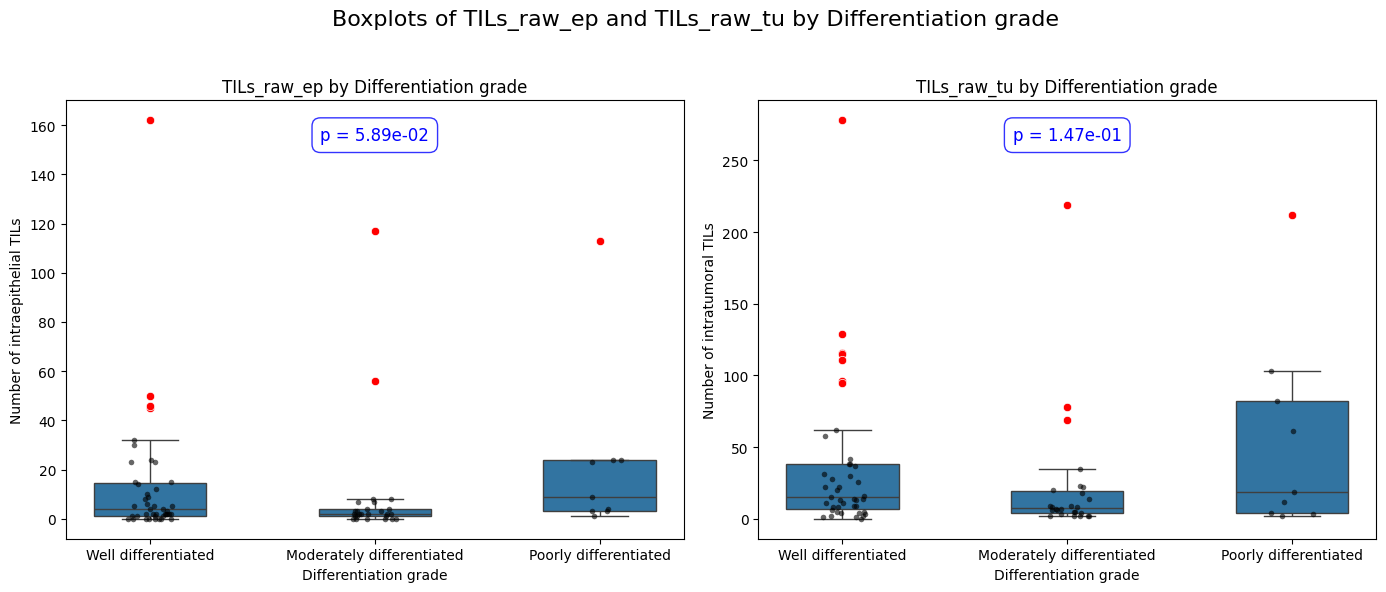

In [7]:
### Analyze statistics and distribution of TILs_raw_ep and TILs_raw_tu in each GRADE category in EOC (MMRp and MMRd) #####
# We evaluate differences across all groups simultaneously using Kruskal-Wallis test
from scipy.stats import kruskal # Function to Kruskal-Wallis test (non-parametric test for multiple groups)

# Uncomment to import the libraries if not done previously 
# import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)


def analyze_and_plot_tils_by_grade(df, output_folder, output_file):
    # Prepare data
    def prepare_data(df):
        df = df.copy()
        # Filter out rows with NaN values in the FIGOL column
        df = df[df['GRADE'].notna()]
        df['TILs_raw_ep'] = pd.to_numeric(df['TILs_raw_ep'], errors='coerce')
        df['TILs_raw_tu'] = pd.to_numeric(df['TILs_raw_tu'], errors='coerce')

        # Asegurar el orden correcto de las categorías en GRADE
        grade_order = ["Well differentiated", "Moderately differentiated", "Poorly differentiated"]
        df['GRADE'] = pd.Categorical(df['GRADE'], categories=grade_order, ordered=True)
        return df.dropna(subset=['TILs_raw_ep', 'TILs_raw_tu'])

    df = prepare_data(df)

    # Filter outliers
    def filter_outliers(df, variable):
        categories = df['GRADE'].unique()
        non_outliers = pd.DataFrame()
        outliers = pd.DataFrame()
        for category in categories:
            category_data = df[df['GRADE'] == category]
            Q1 = category_data[variable].quantile(0.25)
            Q3 = category_data[variable].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            filtered = category_data[
                (category_data[variable] >= lower_bound) &
                (category_data[variable] <= upper_bound)
            ]
            outlier_data = category_data[
                (category_data[variable] < lower_bound) |
                (category_data[variable] > upper_bound)
            ]
            non_outliers = pd.concat([non_outliers, filtered])
            outliers = pd.concat([outliers, outlier_data])
        return non_outliers, outliers

    # Print outliers info function
    def print_outliers_info(df, variable):
        _, outliers = filter_outliers(df, variable)
        if not outliers.empty:
            print(f"Outliers for {variable}:")
            for _, row in outliers.iterrows():
                print(f"ID_CNIO: {row['ID_CNIO']}, {variable}: {row[variable]}, GRADE: {row['GRADE']}")
        else:
            print(f"No outliers found for {variable}.")

    # Annotate outliers
    def annotate_outliers(ax, df, variable):
        _, outliers = filter_outliers(df, variable)
        sns.scatterplot(
            x='GRADE', y=variable, data=outliers,
            ax=ax, color='red',
        )

    # Annotate p-value
    def annotate_pvalue(ax, df, variable):
        categories = df['GRADE'].unique()
        groups = [df[df['GRADE'] == cat][variable] for cat in categories]
        stat, p_value = kruskal(*groups)

        ax.text(
            x=0.5, y=0.9,
            s=f"p = {p_value:.2e}",
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=12, color='blue',
            transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='blue', boxstyle='round,pad=0.5')
        )

    # Print statistics
    def print_descriptive_stats(df, variable):
        print(f"\nDescriptive statistics for {variable}:")
        for grade in df['GRADE'].cat.categories:
            grade_data = df[df['GRADE'] == grade][variable]
            if not grade_data.empty:
                mean = grade_data.mean()
                median = grade_data.median()
                std_dev = grade_data.std()
                q1 = grade_data.quantile(0.25)
                q3 = grade_data.quantile(0.75)
                count=grade_data.count()
                print(f"\nGRADE: {grade}")
                print(f"  Mean: {mean:.2f}")
                print(f"  Median: {median:.2f}")
                print(f"  Std Dev: {std_dev:.2f}")
                print(f"  Q1: {q1:.2f}")
                print(f"  Q3: {q3:.2f}")
                print(f"  Count: {count}")
            else:
                print(f"\nGRADE: {grade} - No data available.")

    # Create figures
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

    # Plot for TILs_raw_ep
    df_filtered, df_outliers = filter_outliers(df, 'TILs_raw_ep')
    sns.boxplot(
        x='GRADE', y='TILs_raw_ep', data=df,
        ax=axes[0], width=0.5, showfliers=False
    )
    sns.stripplot(
        x='GRADE', y='TILs_raw_ep', data=df_filtered,
        ax=axes[0], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[0], df, 'TILs_raw_ep')
    annotate_pvalue(axes[0], df, 'TILs_raw_ep')
    axes[0].set_ylabel('Number of intraepithelial TILs')
    axes[0].set_xlabel('Differentiation grade')
    axes[0].set_title('TILs_raw_ep by Differentiation grade')

    # Print outliers for TILs_raw_ep
    print_outliers_info(df, 'TILs_raw_ep')

    # Plot for TILs_raw_tu
    df_filtered, df_outliers = filter_outliers(df, 'TILs_raw_tu')
    sns.boxplot(
        x='GRADE', y='TILs_raw_tu', data=df,
        ax=axes[1], width=0.5, showfliers=False
    )
    sns.stripplot(
        x='GRADE', y='TILs_raw_tu', data=df_filtered,
        ax=axes[1], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[1], df, 'TILs_raw_tu')
    annotate_pvalue(axes[1], df, 'TILs_raw_tu')
    axes[1].set_ylabel('Number of intratumoral TILs')
    axes[1].set_xlabel('Differentiation grade')
    axes[1].set_title('TILs_raw_tu by Differentiation grade')

    # Print outliers for TILs_raw_tu
    print_outliers_info(df, 'TILs_raw_tu')

    # Print statistics
    print_descriptive_stats(df, 'TILs_raw_ep')
    print_descriptive_stats(df, 'TILs_raw_tu')

    # Final adjust
    fig.suptitle('Boxplots of TILs_raw_ep and TILs_raw_tu by Differentiation grade', fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])

    # Save
    os.makedirs(output_folder, exist_ok=True)
    plt.savefig(f'{output_folder}/{output_file}', format='png', bbox_inches='tight')
    plt.show()

# Use
#output_folder = '/home/vant/TFM/Plots_TFM_final/'
#output_file = 'Boxplot_TILs_raw_by_Grade_EOC.png'

# Call the function
analyze_and_plot_tils_by_grade(df_eoc, output_folder, output_file)

Number of samples in each category:
Well differentiated: 43
Moderately differentiated: 26
Poorly differentiated: 9


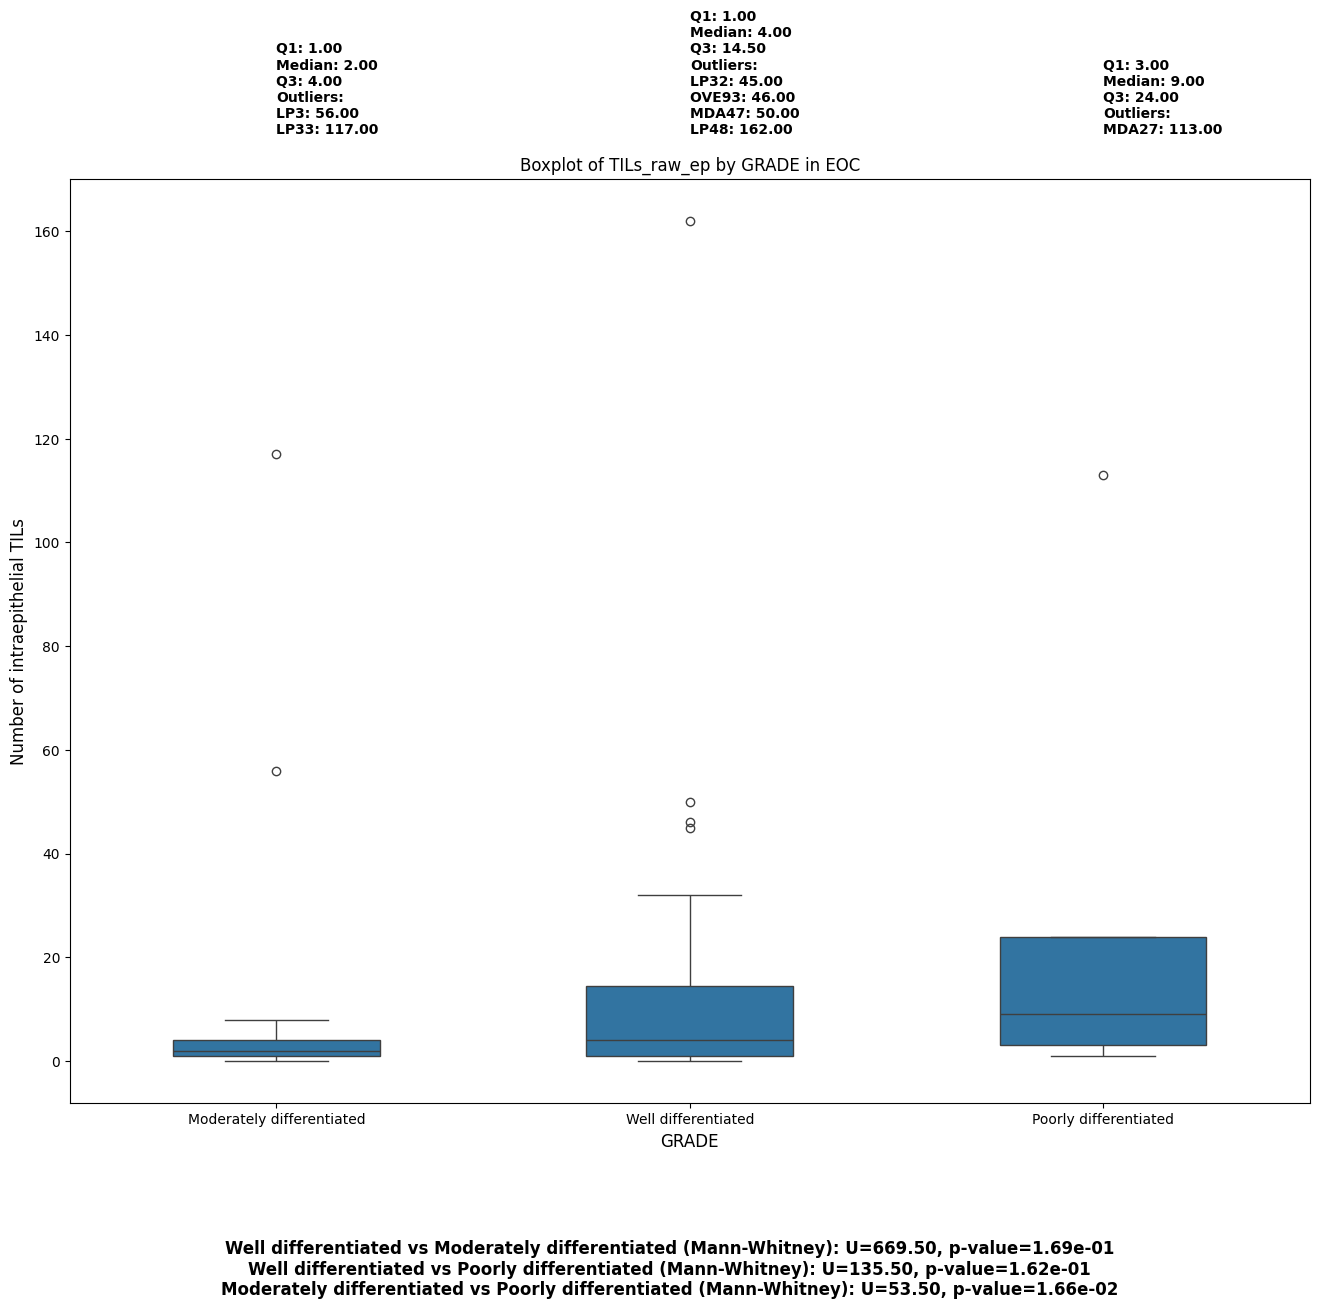

In [8]:
### Analyze statistics and distribution of TILs_raw_ep in each GRADE category in EOC (MMRp and MMRd). Part 2 ######
# We want to perform pairwise comparisons now to see what groups are different

# Uncomment to import the libraries if not done previously 
# import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

def analyze_and_plot(df, output_folder, output_file):
    # Filter out rows with NaN values in the GRADE column
    df = df[df['GRADE'].notna()]
    # Dictionary to store outlier statistics
    outliers_dict = {}
    # Dictionary to store the number of samples in each category
    sample_counts = df['GRADE'].value_counts().to_dict()
    print(f"Number of samples in each category:")
    for category, count in sample_counts.items():
        print(f"{category}: {count}")
    
    # Create a figure for the boxplot
    plt.figure(figsize=(16, 12))  # Increased size for better visibility
    sns.boxplot(x='GRADE', y='TILs_raw_ep', data=df, width=0.5)  # Adjust the width of the boxes
    
    # Variables to store data for each grade category
    tils_grade_well = []
    tils_grade_moderate = []
    tils_grade_poor = []

    for category in df['GRADE'].unique():
        # Filter data for the current category
        category_data = df[df['GRADE'] == category]

        # Calculate Q1, Q3, and median
        Q1 = category_data['TILs_raw_ep'].quantile(0.25)
        Q3 = category_data['TILs_raw_ep'].quantile(0.75)
        median = category_data['TILs_raw_ep'].median()
        IQR = Q3 - Q1
        
        # Define limits for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = category_data[(category_data['TILs_raw_ep'] < lower_bound) | 
                                 (category_data['TILs_raw_ep'] > upper_bound)]
        
        # Store outlier IDs and values
        outliers_dict[category] = {
            'Outlier_IDs': outliers['ID_CNIO'].tolist(),
            'Outlier_Values': outliers['TILs_raw_ep'].tolist(),
            'Q1': Q1,
            'Q3': Q3,
            'Median': median
        }
        
        # Add data to the corresponding lists
        if category == 'Well differentiated':
            tils_grade_well = category_data['TILs_raw_ep'].astype(float).dropna()
        elif category == 'Moderately differentiated':
            tils_grade_moderate = category_data['TILs_raw_ep'].astype(float).dropna()
        elif category == 'Poorly differentiated':
            tils_grade_poor = category_data['TILs_raw_ep'].astype(float).dropna()

    # Prepare for statistical tests
    groups = {
        'Well differentiated': tils_grade_well,
        'Moderately differentiated': tils_grade_moderate,
        'Poorly differentiated': tils_grade_poor
    }
    test_results = {}
    categories = list(groups.keys())

    # Perform tests for each pair of categories
    for i in range(len(categories)):
        for j in range(i + 1, len(categories)):
            cat_a = categories[i]
            cat_b = categories[j]
            data_a = groups[cat_a]
            data_b = groups[cat_b]

            if not data_a.empty and not data_b.empty:
                # Shapiro-Wilk normality test
                shapiro_a = shapiro(data_a)
                shapiro_b = shapiro(data_b)
                
                # Levene's test for homogeneity of variances
                levene_test = levene(data_a, data_b)
                
                # Select the appropriate test
                if shapiro_a.pvalue > 0.05 and shapiro_b.pvalue > 0.05 and levene_test.pvalue > 0.05:
                    # T-test
                    t_test = ttest_ind(data_a, data_b)
                    test_results[f"{cat_a} vs {cat_b} (T-test)"] = f"t={t_test.statistic:.2f}, p-value={t_test.pvalue:.2e}"
                else:
                    # Mann-Whitney U test
                    mannwhitney_test = mannwhitneyu(data_a, data_b, alternative='two-sided')
                    test_results[f"{cat_a} vs {cat_b} (Mann-Whitney)"] = f"U={mannwhitney_test.statistic:.2f}, p-value={mannwhitney_test.pvalue:.2e}"

    # Add the test results as text below the plot
    text_results = "\n".join([f"{comparison}: {result}" for comparison, result in test_results.items()])
    
    # Adjust the position to ensure it fits well under the plot
    plt.figtext(0.5, -0.05, text_results, horizontalalignment='center', fontsize=12, color='black', weight='bold', ha='center')

    # Add text with outliers, Q1, Q3, and Median
    for category, stats in outliers_dict.items():
        sorted_outliers = sorted(zip(stats['Outlier_IDs'], stats['Outlier_Values']), key=lambda x: x[1])
        outlier_text = 'Outliers:\n' + '\n'.join([f'{id_}: {val:.2f}' for id_, val in sorted_outliers]) if stats['Outlier_Values'] else 'No Outliers'
        
        # Always include Q1, Median, and Q3 in the text box
        summary_stats_text = f"Q1: {stats['Q1']:.2f}\nMedian: {stats['Median']:.2f}\nQ3: {stats['Q3']:.2f}\n{outlier_text}"
        
        x_pos = df['GRADE'].unique().tolist().index(category)
        plt.gca().text(
            x=x_pos, 
            y=df['TILs_raw_ep'].max() + 0.1 * (df['TILs_raw_ep'].max() - df['TILs_raw_ep'].min()), 
            s=summary_stats_text,
            horizontalalignment='left', verticalalignment='bottom', 
            fontsize=10, color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )
    
    # Set title and labels for the plot
    plt.title('Boxplot of TILs_raw_ep by GRADE in EOC', fontsize=12)
    plt.xlabel('GRADE', fontsize=12)
    plt.ylabel('Number of intraepithelial TILs', fontsize=12)
    
    # Save the plot as a PDF file
    plt.savefig(f'{output_folder}/{output_file}', format='pdf', bbox_inches='tight')
    
    # Show the plot
    plt.show()

# Use
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_EOC_TILs_raw_ep_by_GRADE.pdf'

# Call the function
analyze_and_plot(df_eoc, output_folder, output_file)

Number of samples in each category:
No: 106
Yes: 18
Shapiro-Wilk test for Yes: W=0.4135, p-value=0.0000
Shapiro-Wilk test for No: W=0.4880, p-value=0.0000
Levene's test: W=0.4032, p-value=0.5266


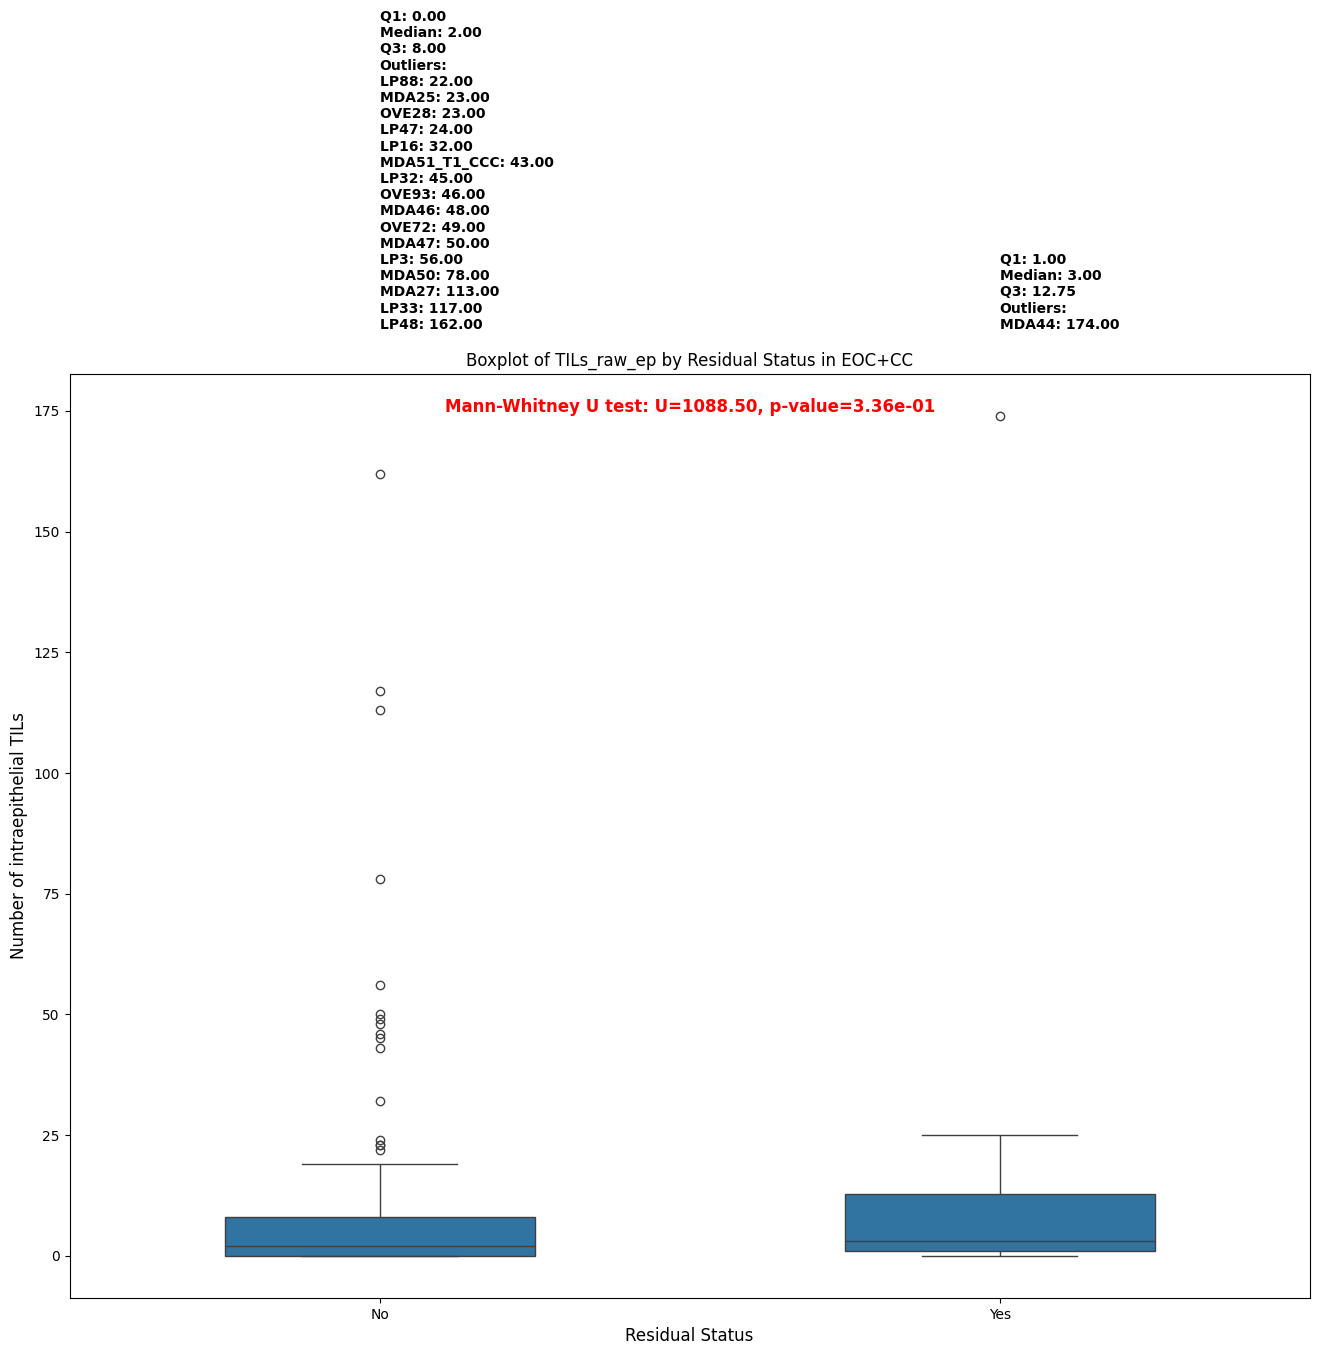

In [9]:
### Analyze statistics and distribution of TILs_raw_ep in each RESIDUALa category in EOC+CC (MMRp and MMRd) #####

# Uncomment to import the libraries if not done previously 
# import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

def analyze_and_plot(df, output_folder, output_file):
    # Filter out rows with NaN values in the RESIDUALa column
    df = df[df['RESIDUALa'].notna()]
    # Dictionary to store outlier statistics
    outliers_dict = {}
    # Dictionary to store the number of samples in each category
    sample_counts = df['RESIDUALa'].value_counts().to_dict()
    print(f"Number of samples in each category:")
    for category, count in sample_counts.items():
        print(f"{category}: {count}")
    # Create a figure for the boxplot
    plt.figure(figsize=(16, 12))  # Increased size for better visibility
    sns.boxplot(x='RESIDUALa', y='TILs_raw_ep', data=df, width=0.5)  # Adjust the width of the boxes
    
    # Variables to store data for the categories
    tils_yes = pd.Series(dtype=float)
    tils_no = pd.Series(dtype=float)

    # Loop through each unique RESIDUALa category to analyze TILs_raw_ep
    for category in df['RESIDUALa'].unique():
        # Filter data for the current category
        category_data = df[df['RESIDUALa'] == category]

        # Calculate Q1, Q3, and median
        Q1 = category_data['TILs_raw_ep'].quantile(0.25)
        Q3 = category_data['TILs_raw_ep'].quantile(0.75)
        median = category_data['TILs_raw_ep'].median()
        IQR = Q3 - Q1
        
        # Define limits for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = category_data[(category_data['TILs_raw_ep'] < lower_bound) | 
                                 (category_data['TILs_raw_ep'] > upper_bound)]
        
        # Store outlier IDs and values
        outliers_dict[category] = {
            'Outlier_IDs': outliers['ID_CNIO'].tolist(),
            'Outlier_Values': outliers['TILs_raw_ep'].tolist(),
            'Q1': Q1,
            'Q3': Q3,
            'Median': median
        }
        
        # Collect TIL values for statistical tests based on category
        if category == 'Yes':
            tils_yes = category_data['TILs_raw_ep'].astype(float).dropna()
        elif category == 'No':
            tils_no = category_data['TILs_raw_ep'].astype(float).dropna()

    # Perform statistical tests if both groups are present
    if not tils_yes.empty and not tils_no.empty:
        # Shapiro-Wilk normality test
        shapiro_yes = shapiro(tils_yes)
        shapiro_no = shapiro(tils_no)
        print(f"Shapiro-Wilk test for Yes: W={shapiro_yes.statistic:.4f}, p-value={shapiro_yes.pvalue:.4f}")
        print(f"Shapiro-Wilk test for No: W={shapiro_no.statistic:.4f}, p-value={shapiro_no.pvalue:.4f}")
        
        # Levene's test for homogeneity of variances
        levene_test = levene(tils_yes, tils_no)
        print(f"Levene's test: W={levene_test.statistic:.4f}, p-value={levene_test.pvalue:.4f}")
        
        # Select the appropriate test based on normality and variance
        if shapiro_yes.pvalue > 0.05 and shapiro_no.pvalue > 0.05 and levene_test.pvalue > 0.05:
            # T-test
            t_test = ttest_ind(tils_yes, tils_no)
            test_result = f"T-test: t={t_test.statistic:.2f}, p-value={t_test.pvalue:.2e}"  # .2e for scientific notation
        else:
            # Mann-Whitney U test
            mannwhitney_test = mannwhitneyu(tils_yes, tils_no, alternative='two-sided')
            test_result = f"Mann-Whitney U test: U={mannwhitney_test.statistic:.2f}, p-value={mannwhitney_test.pvalue:.2e}"
        
        # Add the test result to the plot
        plt.gca().text(
            x=0.5, y=df['TILs_raw_ep'].max(), 
            s=test_result,
            horizontalalignment='center', verticalalignment='bottom', 
            fontsize=12, color='red', 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )

    # Add text with outliers, Q1, Q3, and Median
    for category, stats in outliers_dict.items():
        sorted_outliers = sorted(zip(stats['Outlier_IDs'], stats['Outlier_Values']), key=lambda x: x[1])
        outlier_text = 'Outliers:\n' + '\n'.join([f'{id_}: {val:.2f}' for id_, val in sorted_outliers]) if stats['Outlier_Values'] else 'No Outliers'
        
        # Include Q1, Median, and Q3 in the text box
        summary_stats_text = f"Q1: {stats['Q1']:.2f}\nMedian: {stats['Median']:.2f}\nQ3: {stats['Q3']:.2f}\n{outlier_text}"
        
        x_pos = df['RESIDUALa'].unique().tolist().index(category)
        plt.gca().text(
            x=x_pos, 
            y=df['TILs_raw_ep'].max() + 0.1 * (df['TILs_raw_ep'].max() - df['TILs_raw_ep'].min()), 
            s=summary_stats_text,
            horizontalalignment='left', verticalalignment='bottom', 
            fontsize=10, color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )
    
    # Set title and labels for the plot
    plt.title('Boxplot of TILs_raw_ep by Residual Status in EOC+CC', fontsize=12)
    plt.xlabel('Residual Status', fontsize=12)
    plt.ylabel('Number of intraepithelial TILs', fontsize=12)
    
    # Save the plot as a PDF file
    plt.savefig(f'{output_folder}/{output_file}', format='pdf', bbox_inches='tight')
    
    # Show the plot
    plt.show()

# Use
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_TILs_raw_ep_by_RESIDUALa_EOC+CC.pdf'

# Call the function
analyze_and_plot(df, output_folder, output_file)


Number of samples in each category:
No: 65
Yes: 4
Shapiro-Wilk test for Yes: W=0.7680, p-value=0.0562
Shapiro-Wilk test for No: W=0.4914, p-value=0.0000
Levene's test: W=0.0108, p-value=0.9175


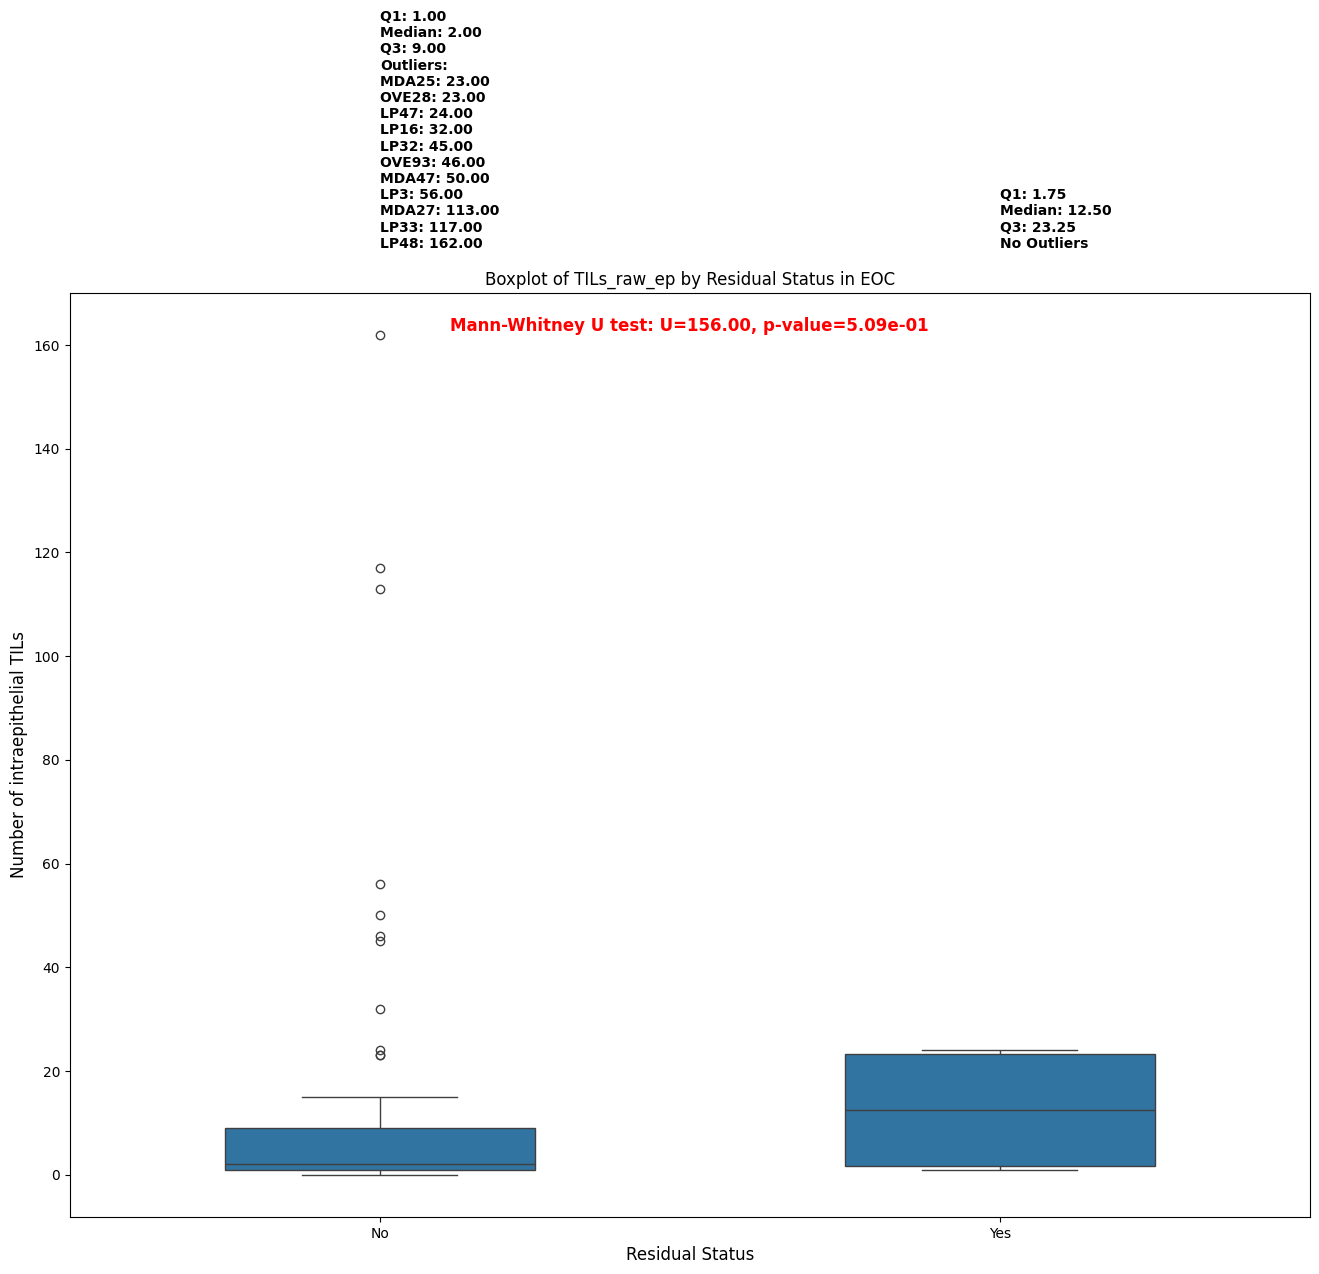

In [10]:
### Analyze statistics and distribution of TILs_raw_ep in each RESIDUALa category in EOC (MMRp and MMRd) #####

# Uncomment to import the libraries if not done previously 
# import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

def analyze_and_plot(df, output_folder, output_file):
    # Filter out rows with NaN values in the RESIDUALa column
    df = df[df['RESIDUALa'].notna()]
    # Dictionary to store outlier statistics
    outliers_dict = {}
    # Dictionary to store the number of samples in each category
    sample_counts = df['RESIDUALa'].value_counts().to_dict()
    print(f"Number of samples in each category:")
    for category, count in sample_counts.items():
        print(f"{category}: {count}")
    # Create a figure for the boxplot
    plt.figure(figsize=(16, 12))  # Increased size for better visibility
    sns.boxplot(x='RESIDUALa', y='TILs_raw_ep', data=df, width=0.5)  # Adjust the width of the boxes
    
    # Variables to store data for the categories
    tils_yes = pd.Series(dtype=float)
    tils_no = pd.Series(dtype=float)

    # Loop through each unique RESIDUALa category to analyze TILs_raw_ep
    for category in df['RESIDUALa'].unique():
        # Filter data for the current category
        category_data = df[df['RESIDUALa'] == category]

        # Calculate Q1, Q3, and median
        Q1 = category_data['TILs_raw_ep'].quantile(0.25)
        Q3 = category_data['TILs_raw_ep'].quantile(0.75)
        median = category_data['TILs_raw_ep'].median()
        IQR = Q3 - Q1
        
        # Define limits for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = category_data[(category_data['TILs_raw_ep'] < lower_bound) | 
                                 (category_data['TILs_raw_ep'] > upper_bound)]
        
        # Store outlier IDs and values
        outliers_dict[category] = {
            'Outlier_IDs': outliers['ID_CNIO'].tolist(),
            'Outlier_Values': outliers['TILs_raw_ep'].tolist(),
            'Q1': Q1,
            'Q3': Q3,
            'Median': median
        }
        
        # Collect TIL values for statistical tests based on category
        if category == 'Yes':
            tils_yes = category_data['TILs_raw_ep'].astype(float).dropna()
        elif category == 'No':
            tils_no = category_data['TILs_raw_ep'].astype(float).dropna()

    # Perform statistical tests if both groups are present
    if not tils_yes.empty and not tils_no.empty:
        # Shapiro-Wilk normality test
        shapiro_yes = shapiro(tils_yes)
        shapiro_no = shapiro(tils_no)
        print(f"Shapiro-Wilk test for Yes: W={shapiro_yes.statistic:.4f}, p-value={shapiro_yes.pvalue:.4f}")
        print(f"Shapiro-Wilk test for No: W={shapiro_no.statistic:.4f}, p-value={shapiro_no.pvalue:.4f}")
        
        # Levene's test for homogeneity of variances
        levene_test = levene(tils_yes, tils_no)
        print(f"Levene's test: W={levene_test.statistic:.4f}, p-value={levene_test.pvalue:.4f}")
        
        # Select the appropriate test based on normality and variance
        if shapiro_yes.pvalue > 0.05 and shapiro_no.pvalue > 0.05 and levene_test.pvalue > 0.05:
            # T-test
            t_test = ttest_ind(tils_yes, tils_no)
            test_result = f"T-test: t={t_test.statistic:.2f}, p-value={t_test.pvalue:.2e}"  # .2e for scientific notation
        else:
            # Mann-Whitney U test
            mannwhitney_test = mannwhitneyu(tils_yes, tils_no, alternative='two-sided')
            test_result = f"Mann-Whitney U test: U={mannwhitney_test.statistic:.2f}, p-value={mannwhitney_test.pvalue:.2e}"
        
        # Add the test result to the plot
        plt.gca().text(
            x=0.5, y=df['TILs_raw_ep'].max(), 
            s=test_result,
            horizontalalignment='center', verticalalignment='bottom', 
            fontsize=12, color='red', 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )

    # Add text with outliers, Q1, Q3, and Median
    for category, stats in outliers_dict.items():
        sorted_outliers = sorted(zip(stats['Outlier_IDs'], stats['Outlier_Values']), key=lambda x: x[1])
        outlier_text = 'Outliers:\n' + '\n'.join([f'{id_}: {val:.2f}' for id_, val in sorted_outliers]) if stats['Outlier_Values'] else 'No Outliers'
        
        # Include Q1, Median, and Q3 in the text box
        summary_stats_text = f"Q1: {stats['Q1']:.2f}\nMedian: {stats['Median']:.2f}\nQ3: {stats['Q3']:.2f}\n{outlier_text}"
        
        x_pos = df['RESIDUALa'].unique().tolist().index(category)
        plt.gca().text(
            x=x_pos, 
            y=df['TILs_raw_ep'].max() + 0.1 * (df['TILs_raw_ep'].max() - df['TILs_raw_ep'].min()), 
            s=summary_stats_text,
            horizontalalignment='left', verticalalignment='bottom', 
            fontsize=10, color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )
    
    # Set title and labels for the plot
    plt.title('Boxplot of TILs_raw_ep by Residual Status in EOC', fontsize=12)
    plt.xlabel('Residual Status', fontsize=12)
    plt.ylabel('Number of intraepithelial TILs', fontsize=12)
    
    # Save the plot as a PDF file
    plt.savefig(f'{output_folder}/{output_file}', format='pdf', bbox_inches='tight')
    
    # Show the plot
    plt.show()

# Use
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_TILs_raw_ep_by_RESIDUALa_EOC.pdf'

# Call the function
analyze_and_plot(df_eoc, output_folder, output_file)

Number of samples in each category:
No: 41
Yes: 14
Shapiro-Wilk test for Yes: W=0.4072, p-value=0.0000
Shapiro-Wilk test for No: W=0.5343, p-value=0.0000
Levene's test: W=1.0847, p-value=0.3024


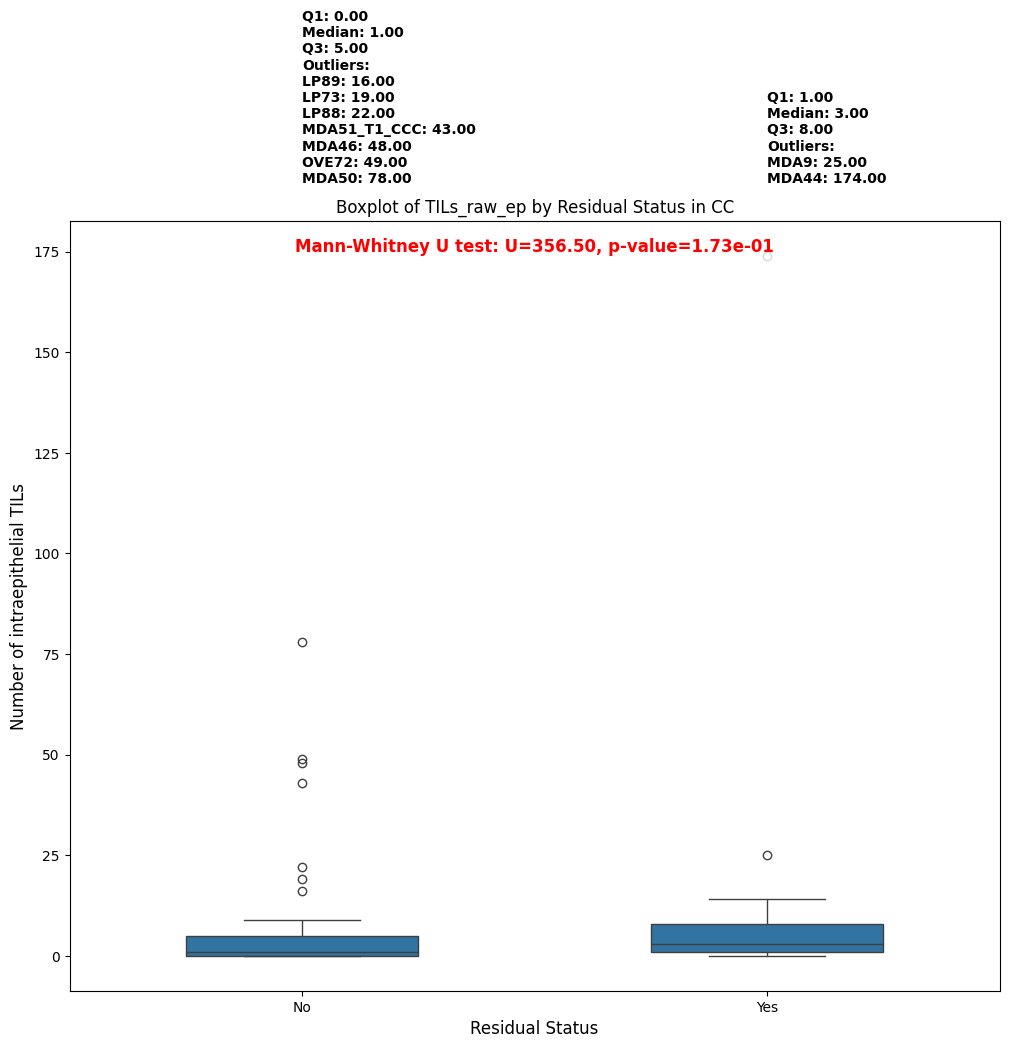

In [11]:
### Analyze statistics and distribution of TILs_raw_ep in each RESIDUALa category in CCOC (MMRp and MMRd) #####

# Uncomment to import the libraries if not done previously 
# import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

def analyze_and_plot(df, output_folder, output_file):
    # Filter out rows with NaN values in the RESIDUALa column
    df = df[df['RESIDUALa'].notna()]
    # Dictionary to store outlier statistics
    outliers_dict = {}
    # Dictionary to store the number of samples in each category
    sample_counts = df['RESIDUALa'].value_counts().to_dict()
    print(f"Number of samples in each category:")
    for category, count in sample_counts.items():
        print(f"{category}: {count}")
    # Create a figure for the boxplot
    plt.figure(figsize=(12, 10))  # Increased size for better visibility
    sns.boxplot(x='RESIDUALa', y='TILs_raw_ep', data=df, width=0.5)  # Adjust the width of the boxes
    
    # Variables to store data for the categories
    tils_yes = pd.Series(dtype=float)
    tils_no = pd.Series(dtype=float)

    # Loop through each unique RESIDUALa category to analyze TILs_raw_ep
    for category in df['RESIDUALa'].unique():
        # Filter data for the current category
        category_data = df[df['RESIDUALa'] == category]

        # Calculate Q1, Q3, and median
        Q1 = category_data['TILs_raw_ep'].quantile(0.25)
        Q3 = category_data['TILs_raw_ep'].quantile(0.75)
        median = category_data['TILs_raw_ep'].median()
        IQR = Q3 - Q1
        
        # Define limits for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = category_data[(category_data['TILs_raw_ep'] < lower_bound) | 
                                 (category_data['TILs_raw_ep'] > upper_bound)]
        
        # Store outlier IDs and values
        outliers_dict[category] = {
            'Outlier_IDs': outliers['ID_CNIO'].tolist(),
            'Outlier_Values': outliers['TILs_raw_ep'].tolist(),
            'Q1': Q1,
            'Q3': Q3,
            'Median': median
        }
        
        # Collect TIL values for statistical tests based on category
        if category == 'Yes':
            tils_yes = category_data['TILs_raw_ep'].astype(float).dropna()
        elif category == 'No':
            tils_no = category_data['TILs_raw_ep'].astype(float).dropna()

    # Perform statistical tests if both groups are present
    if not tils_yes.empty and not tils_no.empty:
        # Shapiro-Wilk normality test
        shapiro_yes = shapiro(tils_yes)
        shapiro_no = shapiro(tils_no)
        print(f"Shapiro-Wilk test for Yes: W={shapiro_yes.statistic:.4f}, p-value={shapiro_yes.pvalue:.4f}")
        print(f"Shapiro-Wilk test for No: W={shapiro_no.statistic:.4f}, p-value={shapiro_no.pvalue:.4f}")
        
        # Levene's test for homogeneity of variances
        levene_test = levene(tils_yes, tils_no)
        print(f"Levene's test: W={levene_test.statistic:.4f}, p-value={levene_test.pvalue:.4f}")
        
        # Select the appropriate test based on normality and variance
        if shapiro_yes.pvalue > 0.05 and shapiro_no.pvalue > 0.05 and levene_test.pvalue > 0.05:
            # T-test
            t_test = ttest_ind(tils_yes, tils_no)
            test_result = f"T-test: t={t_test.statistic:.2f}, p-value={t_test.pvalue:.2e}"  # .2e for scientific notation
        else:
            # Mann-Whitney U test
            mannwhitney_test = mannwhitneyu(tils_yes, tils_no, alternative='two-sided')
            test_result = f"Mann-Whitney U test: U={mannwhitney_test.statistic:.2f}, p-value={mannwhitney_test.pvalue:.2e}"
        
        # Add the test result to the plot
        plt.gca().text(
            x=0.5, y=df['TILs_raw_ep'].max(), 
            s=test_result,
            horizontalalignment='center', verticalalignment='bottom', 
            fontsize=12, color='red', 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )

    # Add text with outliers, Q1, Q3, and Median
    for category, stats in outliers_dict.items():
        sorted_outliers = sorted(zip(stats['Outlier_IDs'], stats['Outlier_Values']), key=lambda x: x[1])
        outlier_text = 'Outliers:\n' + '\n'.join([f'{id_}: {val:.2f}' for id_, val in sorted_outliers]) if stats['Outlier_Values'] else 'No Outliers'
        
        # Include Q1, Median, and Q3 in the text box
        summary_stats_text = f"Q1: {stats['Q1']:.2f}\nMedian: {stats['Median']:.2f}\nQ3: {stats['Q3']:.2f}\n{outlier_text}"
        
        x_pos = df['RESIDUALa'].unique().tolist().index(category)
        plt.gca().text(
            x=x_pos, 
            y=df['TILs_raw_ep'].max() + 0.1 * (df['TILs_raw_ep'].max() - df['TILs_raw_ep'].min()), 
            s=summary_stats_text,
            horizontalalignment='left', verticalalignment='bottom', 
            fontsize=10, color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )
    
    # Set title and labels for the plot
    plt.title('Boxplot of TILs_raw_ep by Residual Status in CC', fontsize=12)
    plt.xlabel('Residual Status', fontsize=12)
    plt.ylabel('Number of intraepithelial TILs', fontsize=12)
    
    # Save the plot as a PDF file
    plt.savefig(f'{output_folder}/{output_file}', format='pdf', bbox_inches='tight')
    
    # Show the plot
    plt.show()

# Example usage
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_TILs_raw_ep_by_RESIDUALa_CC.pdf'

# Call the function
analyze_and_plot(df_cc, output_folder, output_file)


In [13]:
############ ANALYSIS OF RELATIONSHIPS BETWEEN TILs AND CLINICAL VARIABLES IN MMRp SAMPLES ####################

Number of samples in each category:
Localized: 100
Advanced: 37
Shapiro-Wilk test for loc: W=0.4945, p-value=0.0000
Shapiro-Wilk test for adv: W=0.5181, p-value=0.0000
Levene's test: W=5.0071, p-value=0.0269


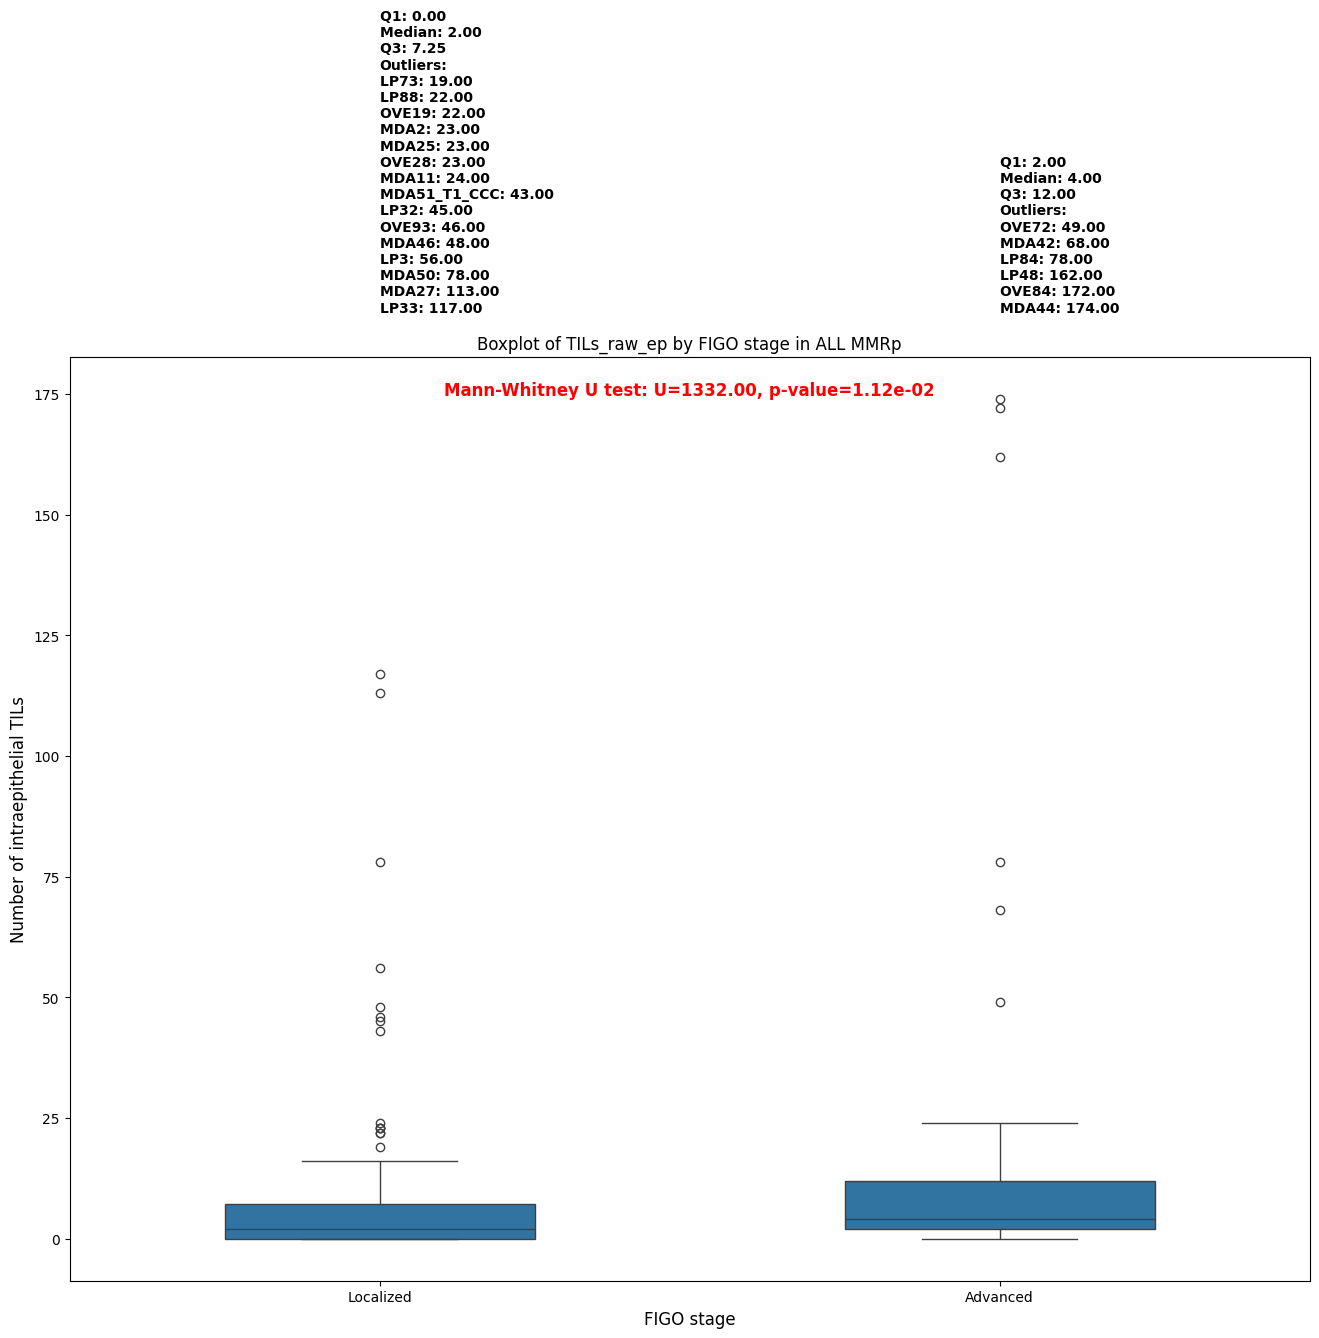

In [14]:
### Analyze statistics and distribution of TILs_raw_ep in each FIGOL category in ALL MMRp group (EOC+CC) ############

# Uncomment to import the libraries if not done previously 
# import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

def analyze_and_plot(df, output_folder, output_file):
    # Filter out rows with NaN values in the FIGOL column
    df = df[df['FIGOL'].notna()]
    # Dictionary to store outlier statistics
    outliers_dict = {}

    sample_counts = df['FIGOL'].value_counts().to_dict()
    print(f"Number of samples in each category:")
    for category, count in sample_counts.items():
        print(f"{category}: {count}")
        
    # Create a figure for the boxplot
    plt.figure(figsize=(16, 12))  # Increased size for better visibility
    sns.boxplot(x='FIGOL', y='TILs_raw_ep', data=df, width=0.5)  # Adjust the width of the boxes
    
    # Variables to store data for MMRp and MMRd
    tils_figoloc = []
    tils_figoadv = []

    for category in df['FIGOL'].unique():
        # Filter data for the current category
        category_data = df[df['FIGOL'] == category]

        # Calculate Q1, Q3, and median
        Q1 = category_data['TILs_raw_ep'].quantile(0.25)
        Q3 = category_data['TILs_raw_ep'].quantile(0.75)
        median = category_data['TILs_raw_ep'].median()
        IQR = Q3 - Q1
        
        # Define limits for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = category_data[(category_data['TILs_raw_ep'] < lower_bound) | 
                                 (category_data['TILs_raw_ep'] > upper_bound)]
        
        # Store outlier IDs and values
        outliers_dict[category] = {
            'Outlier_IDs': outliers['ID_CNIO'].tolist(),
            'Outlier_Values': outliers['TILs_raw_ep'].tolist(),
            'Q1': Q1,
            'Q3': Q3,
            'Median': median
        }
        
        # Add data to the corresponding lists
        if category == 'Localized':
            tils_figoloc = category_data['TILs_raw_ep'].astype(float).dropna()
        elif category == 'Advanced':
            tils_figoadv = category_data['TILs_raw_ep'].astype(float).dropna()

    # Perform statistical tests
    if not tils_figoloc.empty and not tils_figoadv.empty:
        # Shapiro-Wilk normality test
        shapiro_loc = shapiro(tils_figoloc)
        shapiro_adv = shapiro(tils_figoadv)
        print(f"Shapiro-Wilk test for loc: W={shapiro_loc.statistic:.4f}, p-value={shapiro_loc.pvalue:.4f}")
        print(f"Shapiro-Wilk test for adv: W={shapiro_adv.statistic:.4f}, p-value={shapiro_adv.pvalue:.4f}")
        
        # Levene's test for homogeneity of variances
        levene_test = levene(tils_figoloc, tils_figoadv)
        print(f"Levene's test: W={levene_test.statistic:.4f}, p-value={levene_test.pvalue:.4f}")
        
        # Select the appropriate test
        if shapiro_loc.pvalue > 0.05 and shapiro_adv.pvalue > 0.05 and levene_test.pvalue > 0.05:
            # T-test
            t_test = ttest_ind(tils_figoloc, tils_figoadv)
            test_result = f"T-test: t={t_test.statistic:.2f}, p-value={t_test.pvalue:.2e}"  # .2e for scientific notation
        else:
            # Mann-Whitney U test
            mannwhitney_test = mannwhitneyu(tils_figoloc, tils_figoadv, alternative='two-sided')
            test_result = f"Mann-Whitney U test: U={mannwhitney_test.statistic:.2f}, p-value={mannwhitney_test.pvalue:.2e}"
        
        # Add the test result to the plot
        plt.gca().text(
            x=0.5, y=df['TILs_raw_ep'].max(), 
            s=test_result,
            horizontalalignment='center', verticalalignment='bottom', 
            fontsize=12, color='red', 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )

    # Add text with outliers, Q1, Q3, and Median
    for category, stats in outliers_dict.items():
        sorted_outliers = sorted(zip(stats['Outlier_IDs'], stats['Outlier_Values']), key=lambda x: x[1])
        outlier_text = 'Outliers:\n' + '\n'.join([f'{id_}: {val:.2f}' for id_, val in sorted_outliers]) if stats['Outlier_Values'] else 'No Outliers'
        
        # Always include Q1, Median, and Q3 in the text box
        summary_stats_text = f"Q1: {stats['Q1']:.2f}\nMedian: {stats['Median']:.2f}\nQ3: {stats['Q3']:.2f}\n{outlier_text}"
        
        x_pos = df['FIGOL'].unique().tolist().index(category)
        plt.gca().text(
            x=x_pos, 
            y=df['TILs_raw_ep'].max() + 0.1 * (df['TILs_raw_ep'].max() - df['TILs_raw_ep'].min()), 
            s=summary_stats_text,
            horizontalalignment='left', verticalalignment='bottom', 
            fontsize=10, color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )
    
    # Set title and labels for the plot
    plt.title('Boxplot of TILs_raw_ep by FIGO stage in ALL MMRp',fontsize=12)
    plt.xlabel('FIGO stage',fontsize=12)
    plt.ylabel('Number of intraepithelial TILs',fontsize=12)
    
    # Save the plot as a PDF file
    plt.savefig(f'{output_folder}/{output_file}', format='pdf', bbox_inches='tight')
    
    # Show the plot
    plt.show()

# Use
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_ALL_MMRp_TILs_raw_ep_by_FIGOL.pdf'  
# Call the function
analyze_and_plot(df_all_mmrp, output_folder, output_file)

In [15]:
### Analyze distribution of TILs_raw_ep in each FIGOL category by HISTOYPE ############

<Axes: title={'center': 'Distribution of TILs_raw_ep by FIGOL Categories in EOC MMRp'}, xlabel='FIGOL', ylabel='TILs_raw_ep'>

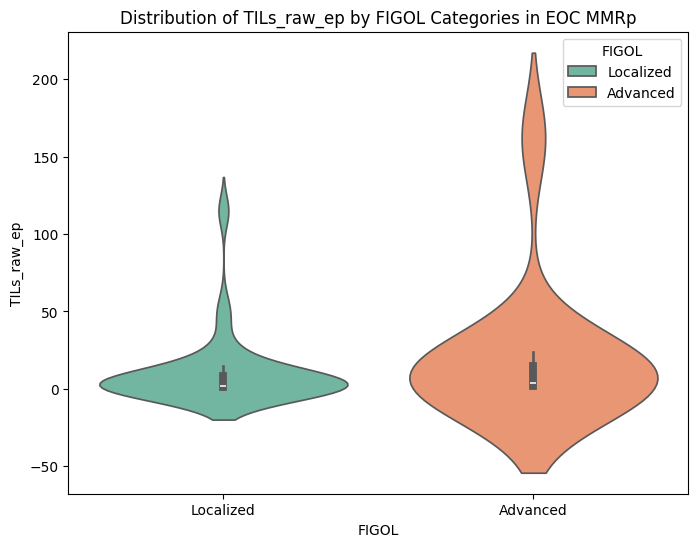

In [16]:
### Analyze distribution of TILs_raw_ep in each FIGOL category in EOC MMRp samples ###########
# Violin plot 
plt.figure(figsize=(8, 6))
# Add title and labels
plt.title('Distribution of TILs_raw_ep by FIGOL Categories in EOC MMRp')
sns.violinplot(x='FIGOL', y='TILs_raw_ep', data=df_eoc_mmrp, hue='FIGOL', palette='Set2')

Number of samples in each category:
Localized: 61
Advanced: 12
Shapiro-Wilk test for MMRp: W=0.4809, p-value=0.0000
Shapiro-Wilk test for MMRd: W=0.4710, p-value=0.0000
Levene's test: W=1.1555, p-value=0.2860


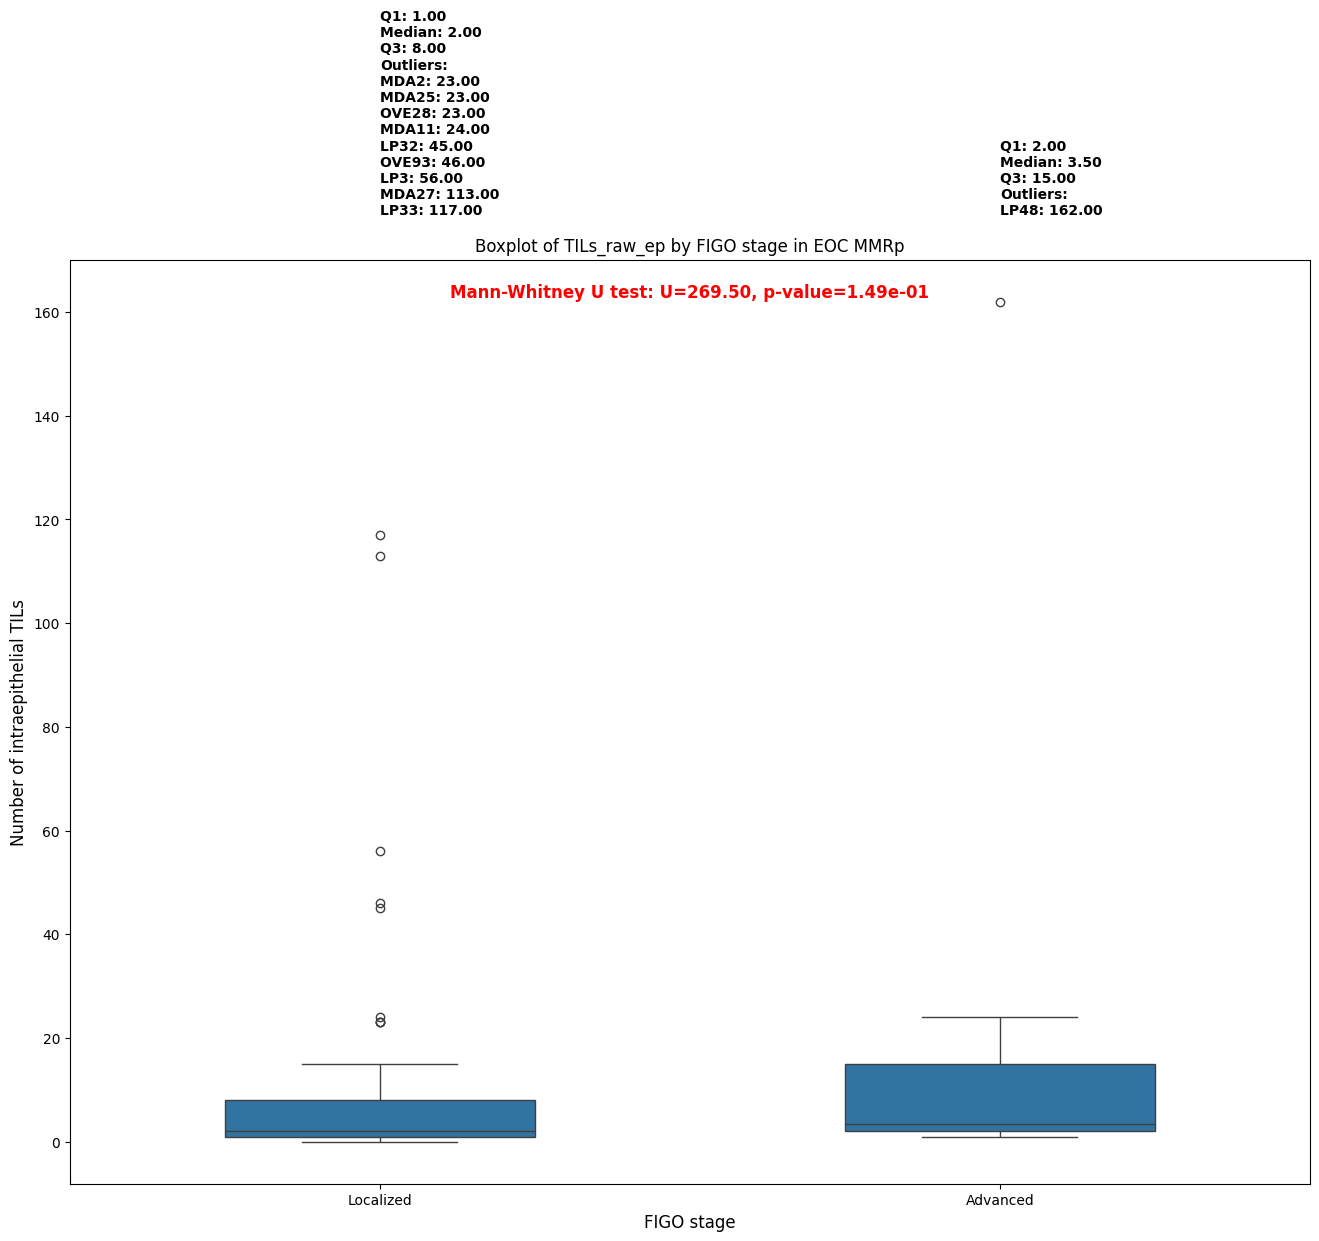

In [18]:
### Analyze the statistics and distribution of TILs_raw_ep in each FIGOL category in EOC MMRp group ############

# Uncomment to import the libraries if not done previously 
# import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

def analyze_and_plot(df, output_folder, output_file):
    # Filter out rows with NaN values in the FIGOL column
    df = df[df['FIGOL'].notna()]
    # Dictionary to store outlier statistics
    outliers_dict = {}

    sample_counts = df['FIGOL'].value_counts().to_dict()
    print(f"Number of samples in each category:")
    for category, count in sample_counts.items():
        print(f"{category}: {count}")
        
    # Create a figure for the boxplot
    plt.figure(figsize=(16, 12))  # Increased size for better visibility
    sns.boxplot(x='FIGOL', y='TILs_raw_ep', data=df, width=0.5)  # Adjust the width of the boxes
    
    # Variables to store data for MMRp and MMRd
    tils_figoloc = []
    tils_figoadv = []

    for category in df['FIGOL'].unique():
        # Filter data for the current category
        category_data = df[df['FIGOL'] == category]

        # Calculate Q1, Q3, and median
        Q1 = category_data['TILs_raw_ep'].quantile(0.25)
        Q3 = category_data['TILs_raw_ep'].quantile(0.75)
        median = category_data['TILs_raw_ep'].median()
        IQR = Q3 - Q1
        
        # Define limits for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = category_data[(category_data['TILs_raw_ep'] < lower_bound) | 
                                 (category_data['TILs_raw_ep'] > upper_bound)]
        
        # Store outlier IDs and values
        outliers_dict[category] = {
            'Outlier_IDs': outliers['ID_CNIO'].tolist(),
            'Outlier_Values': outliers['TILs_raw_ep'].tolist(),
            'Q1': Q1,
            'Q3': Q3,
            'Median': median
        }
        
        # Add data to the corresponding lists
        if category == 'Localized':
            tils_figoloc = category_data['TILs_raw_ep'].astype(float).dropna()
        elif category == 'Advanced':
            tils_figoadv = category_data['TILs_raw_ep'].astype(float).dropna()

    # Perform statistical tests
    if not tils_figoloc.empty and not tils_figoadv.empty:
        # Shapiro-Wilk normality test
        shapiro_loc = shapiro(tils_figoloc)
        shapiro_adv = shapiro(tils_figoadv)
        print(f"Shapiro-Wilk test for MMRp: W={shapiro_loc.statistic:.4f}, p-value={shapiro_loc.pvalue:.4f}")
        print(f"Shapiro-Wilk test for MMRd: W={shapiro_adv.statistic:.4f}, p-value={shapiro_adv.pvalue:.4f}")
        
        # Levene's test for homogeneity of variances
        levene_test = levene(tils_figoloc, tils_figoadv)
        print(f"Levene's test: W={levene_test.statistic:.4f}, p-value={levene_test.pvalue:.4f}")
        
        # Select the appropriate test
        if shapiro_loc.pvalue > 0.05 and shapiro_adv.pvalue > 0.05 and levene_test.pvalue > 0.05:
            # T-test
            t_test = ttest_ind(tils_figoloc, tils_figoadv)
            test_result = f"T-test: t={t_test.statistic:.2f}, p-value={t_test.pvalue:.2e}"  # .2e for scientific notation
        else:
            # Mann-Whitney U test
            mannwhitney_test = mannwhitneyu(tils_figoloc, tils_figoadv, alternative='two-sided')
            test_result = f"Mann-Whitney U test: U={mannwhitney_test.statistic:.2f}, p-value={mannwhitney_test.pvalue:.2e}"
        
        # Add the test result to the plot
        plt.gca().text(
            x=0.5, y=df['TILs_raw_ep'].max(), 
            s=test_result,
            horizontalalignment='center', verticalalignment='bottom', 
            fontsize=12, color='red', 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )

    # Add text with outliers, Q1, Q3, and Median
    for category, stats in outliers_dict.items():
        sorted_outliers = sorted(zip(stats['Outlier_IDs'], stats['Outlier_Values']), key=lambda x: x[1])
        outlier_text = 'Outliers:\n' + '\n'.join([f'{id_}: {val:.2f}' for id_, val in sorted_outliers]) if stats['Outlier_Values'] else 'No Outliers'
        
        # Always include Q1, Median, and Q3 in the text box
        summary_stats_text = f"Q1: {stats['Q1']:.2f}\nMedian: {stats['Median']:.2f}\nQ3: {stats['Q3']:.2f}\n{outlier_text}"
        
        x_pos = df['FIGOL'].unique().tolist().index(category)
        plt.gca().text(
            x=x_pos, 
            y=df['TILs_raw_ep'].max() + 0.1 * (df['TILs_raw_ep'].max() - df['TILs_raw_ep'].min()), 
            s=summary_stats_text,
            horizontalalignment='left', verticalalignment='bottom', 
            fontsize=10, color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )
    
    # Set title and labels for the plot
    plt.title('Boxplot of TILs_raw_ep by FIGO stage in EOC MMRp',fontsize=12)
    plt.xlabel('FIGO stage',fontsize=12)
    plt.ylabel('Number of intraepithelial TILs',fontsize=12)
    
    # Save the plot as a PDF file
    plt.savefig(f'{output_folder}/{output_file}', format='pdf', bbox_inches='tight')
    
    # Show the plot
    plt.show()


# Use
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_EOC_MMRp_TILs_raw_ep_by_FIGOL.pdf'  
# Call the function
analyze_and_plot(df_eoc_mmrp, output_folder, output_file)

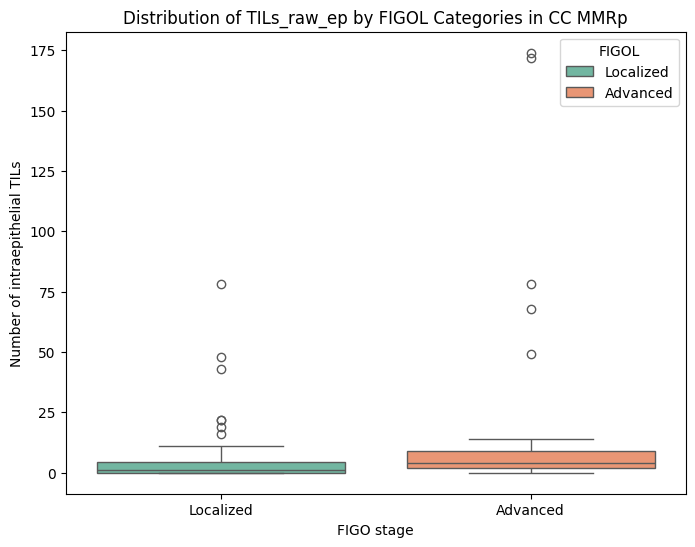

In [19]:
##### EXPLORE RELATIONSHIP BETWEEN FIGO STAGE AND TILs_raw_ep in CCOC MMRp #############

# Simple boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x='FIGOL', y='TILs_raw_ep', data=df_cc_mmrp, hue='FIGOL', palette='Set2')

# Add title and labels
plt.title('Distribution of TILs_raw_ep by FIGOL Categories in CC MMRp')
plt.xlabel('FIGO stage')
plt.ylabel('Number of intraepithelial TILs')

# Show the plot
plt.show()

Number of samples in each category:
Localized: 39
Advanced: 25
Shapiro-Wilk test for MMRp: W=0.5358, p-value=0.0000
Shapiro-Wilk test for MMRd: W=0.5367, p-value=0.0000
Levene's test: W=3.3841, p-value=0.0706


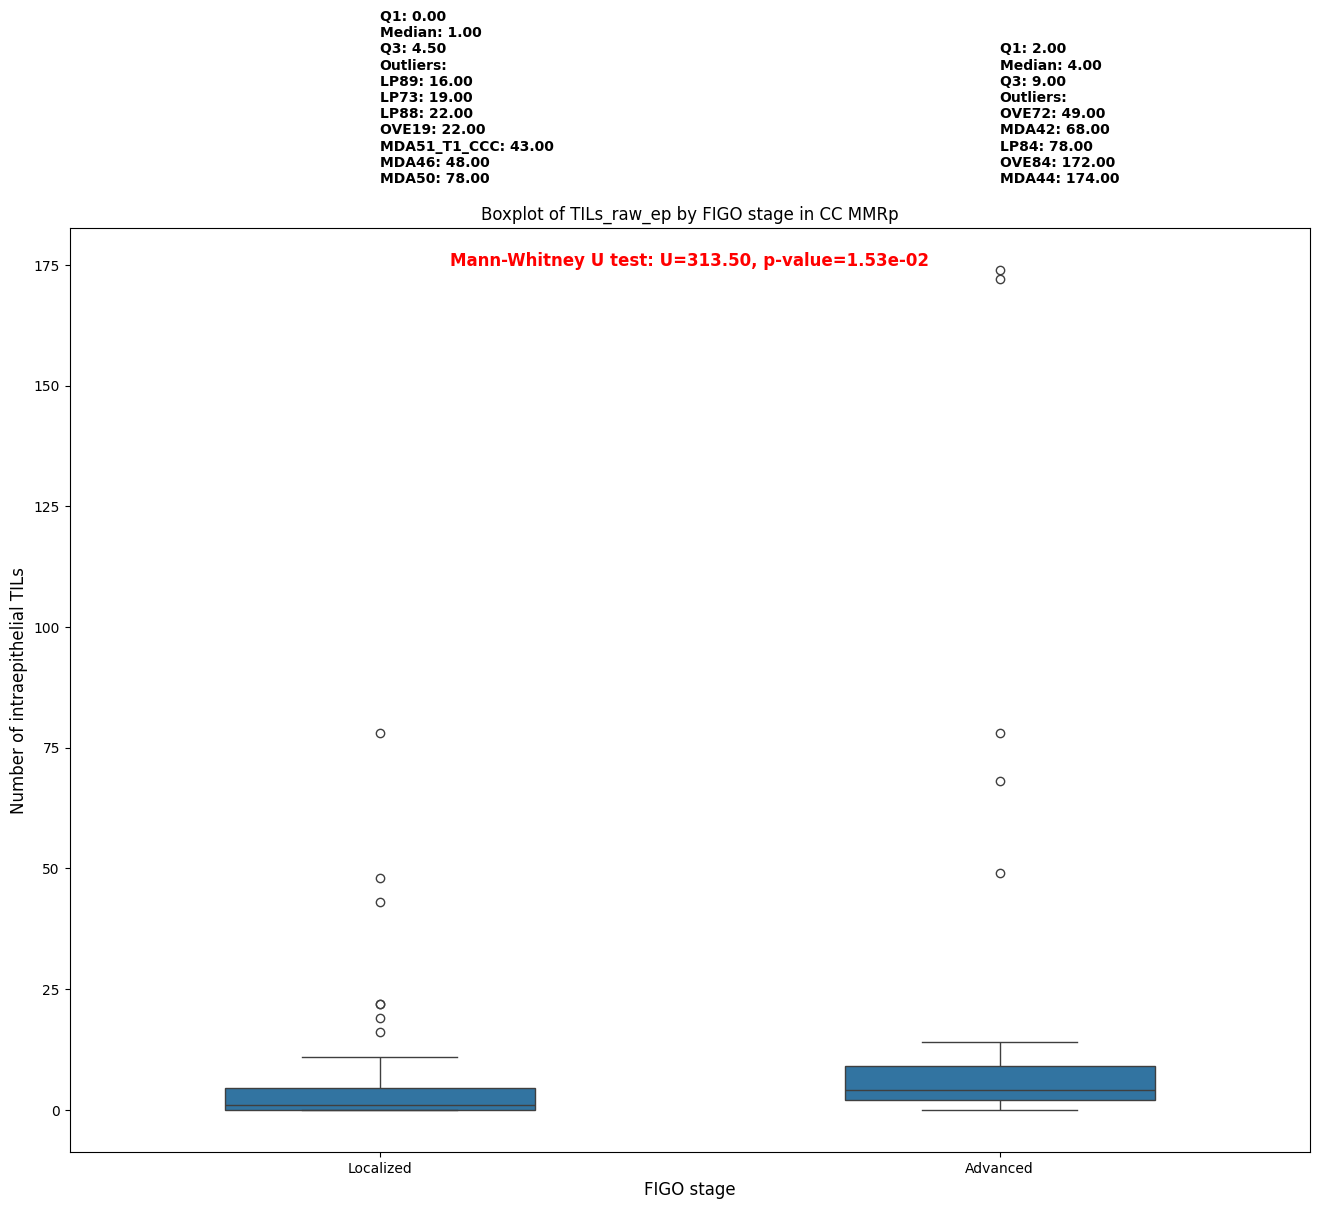

In [20]:
### Analyze statistics and distribution of TILs_raw_ep in each FIGOL category in CCOC MMRp group

# Uncomment to import the libraries if not done previously 
# import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

def analyze_and_plot(df, output_folder, output_file):
    # Filter out rows with NaN values in the FIGOL column
    df = df[df['FIGOL'].notna()]
    # Dictionary to store outlier statistics
    outliers_dict = {}

    sample_counts = df['FIGOL'].value_counts().to_dict()
    print(f"Number of samples in each category:")
    for category, count in sample_counts.items():
        print(f"{category}: {count}")
        
    # Create a figure for the boxplot
    plt.figure(figsize=(16, 12))  # Increased size for better visibility
    sns.boxplot(x='FIGOL', y='TILs_raw_ep', data=df, width=0.5)  # Adjust the width of the boxes
    
    # Variables to store data for MMRp and MMRd
    tils_figoloc = []
    tils_figoadv = []

    for category in df['FIGOL'].unique():
        # Filter data for the current category
        category_data = df[df['FIGOL'] == category]

        # Calculate Q1, Q3, and median
        Q1 = category_data['TILs_raw_ep'].quantile(0.25)
        Q3 = category_data['TILs_raw_ep'].quantile(0.75)
        median = category_data['TILs_raw_ep'].median()
        IQR = Q3 - Q1
        
        # Define limits for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = category_data[(category_data['TILs_raw_ep'] < lower_bound) | 
                                 (category_data['TILs_raw_ep'] > upper_bound)]
        
        # Store outlier IDs and values
        outliers_dict[category] = {
            'Outlier_IDs': outliers['ID_CNIO'].tolist(),
            'Outlier_Values': outliers['TILs_raw_ep'].tolist(),
            'Q1': Q1,
            'Q3': Q3,
            'Median': median
        }
        
        # Add data to the corresponding lists
        if category == 'Localized':
            tils_figoloc = category_data['TILs_raw_ep'].astype(float).dropna()
        elif category == 'Advanced':
            tils_figoadv = category_data['TILs_raw_ep'].astype(float).dropna()

    # Perform statistical tests
    if not tils_figoloc.empty and not tils_figoadv.empty:
        # Shapiro-Wilk normality test
        shapiro_loc = shapiro(tils_figoloc)
        shapiro_adv = shapiro(tils_figoadv)
        print(f"Shapiro-Wilk test for MMRp: W={shapiro_loc.statistic:.4f}, p-value={shapiro_loc.pvalue:.4f}")
        print(f"Shapiro-Wilk test for MMRd: W={shapiro_adv.statistic:.4f}, p-value={shapiro_adv.pvalue:.4f}")
        
        # Levene's test for homogeneity of variances
        levene_test = levene(tils_figoloc, tils_figoadv)
        print(f"Levene's test: W={levene_test.statistic:.4f}, p-value={levene_test.pvalue:.4f}")
        
        # Select the appropriate test
        if shapiro_loc.pvalue > 0.05 and shapiro_adv.pvalue > 0.05 and levene_test.pvalue > 0.05:
            # T-test
            t_test = ttest_ind(tils_figoloc, tils_figoadv)
            test_result = f"T-test: t={t_test.statistic:.2f}, p-value={t_test.pvalue:.2e}"  # .2e for scientific notation
        else:
            # Mann-Whitney U test
            mannwhitney_test = mannwhitneyu(tils_figoloc, tils_figoadv, alternative='two-sided')
            test_result = f"Mann-Whitney U test: U={mannwhitney_test.statistic:.2f}, p-value={mannwhitney_test.pvalue:.2e}"
        
        # Add the test result to the plot
        plt.gca().text(
            x=0.5, y=df['TILs_raw_ep'].max(), 
            s=test_result,
            horizontalalignment='center', verticalalignment='bottom', 
            fontsize=12, color='red', 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )

    # Add text with outliers, Q1, Q3, and Median
    for category, stats in outliers_dict.items():
        sorted_outliers = sorted(zip(stats['Outlier_IDs'], stats['Outlier_Values']), key=lambda x: x[1])
        outlier_text = 'Outliers:\n' + '\n'.join([f'{id_}: {val:.2f}' for id_, val in sorted_outliers]) if stats['Outlier_Values'] else 'No Outliers'
        
        # Always include Q1, Median, and Q3 in the text box
        summary_stats_text = f"Q1: {stats['Q1']:.2f}\nMedian: {stats['Median']:.2f}\nQ3: {stats['Q3']:.2f}\n{outlier_text}"
        
        x_pos = df['FIGOL'].unique().tolist().index(category)
        plt.gca().text(
            x=x_pos, 
            y=df['TILs_raw_ep'].max() + 0.1 * (df['TILs_raw_ep'].max() - df['TILs_raw_ep'].min()), 
            s=summary_stats_text,
            horizontalalignment='left', verticalalignment='bottom', 
            fontsize=10, color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )
    
    # Set title and labels for the plot
    plt.title('Boxplot of TILs_raw_ep by FIGO stage in CC MMRp',fontsize=12)
    plt.xlabel('FIGO stage',fontsize=12)
    plt.ylabel('Number of intraepithelial TILs',fontsize=12)
    
    # Save the plot as a PDF file
    plt.savefig(f'{output_folder}/{output_file}', format='pdf', bbox_inches='tight')
    
    # Show the plot
    plt.show()

# Use
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_CC_MMRp_TILs_raw_ep_by_FIGOL.pdf'  
# Call the function
analyze_and_plot(df_cc_mmrp, output_folder, output_file)

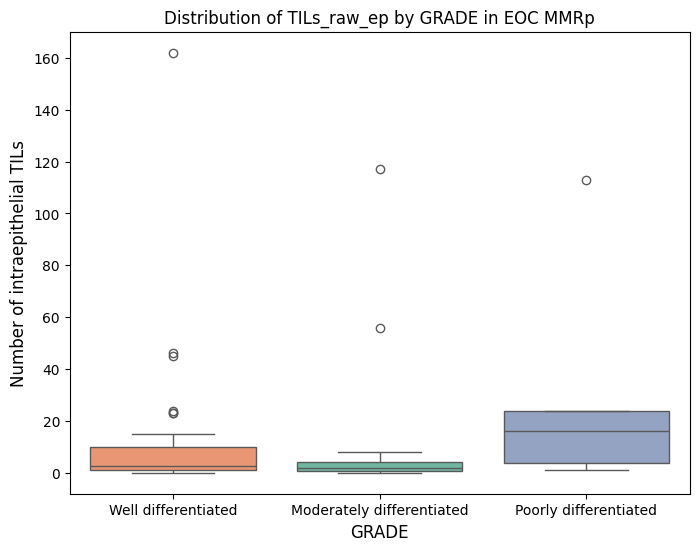

In [21]:
### EXPLORE 'GRADE' clinical variable (Differentiation grade of the tumor) in EOC MMRp samples ###########

order_list=['Well differentiated','Moderately differentiated','Poorly differentiated']

# Simple boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x='GRADE', y='TILs_raw_ep', data=df_eoc_mmrp, hue='GRADE',legend=False,palette='Set2',order=order_list)

# Add title and labels
plt.title('Distribution of TILs_raw_ep by GRADE in EOC MMRp', fontsize=12)
plt.xlabel('GRADE', fontsize=12)
plt.ylabel('Number of intraepithelial TILs', fontsize=12)

# Show the plot
plt.show()

Text(0, 0.5, 'Number of intraepithelial TILs')

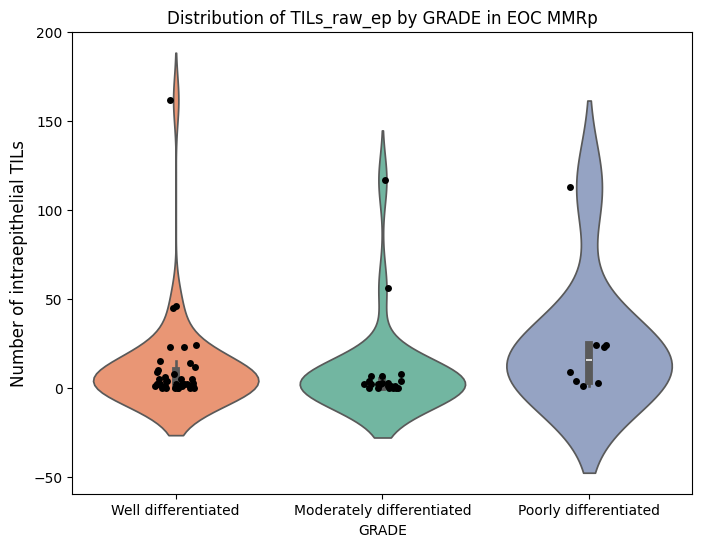

In [22]:
####### Violin plot ###########
plt.figure(figsize=(8, 6))
# Add title and labels
plt.title('Distribution of TILs_raw_ep by GRADE in EOC MMRp')
sns.violinplot(x='GRADE', y='TILs_raw_ep', data=df_eoc_mmrp, hue='GRADE', palette='Set2',legend=False,order=order_list)
sns.stripplot(x='GRADE', y='TILs_raw_ep', data=df_eoc_mmrp,color='black')
plt.ylabel('Number of intraepithelial TILs', fontsize=12)

Number of samples in each category:
Well differentiated: 38
Moderately differentiated: 23
Poorly differentiated: 8


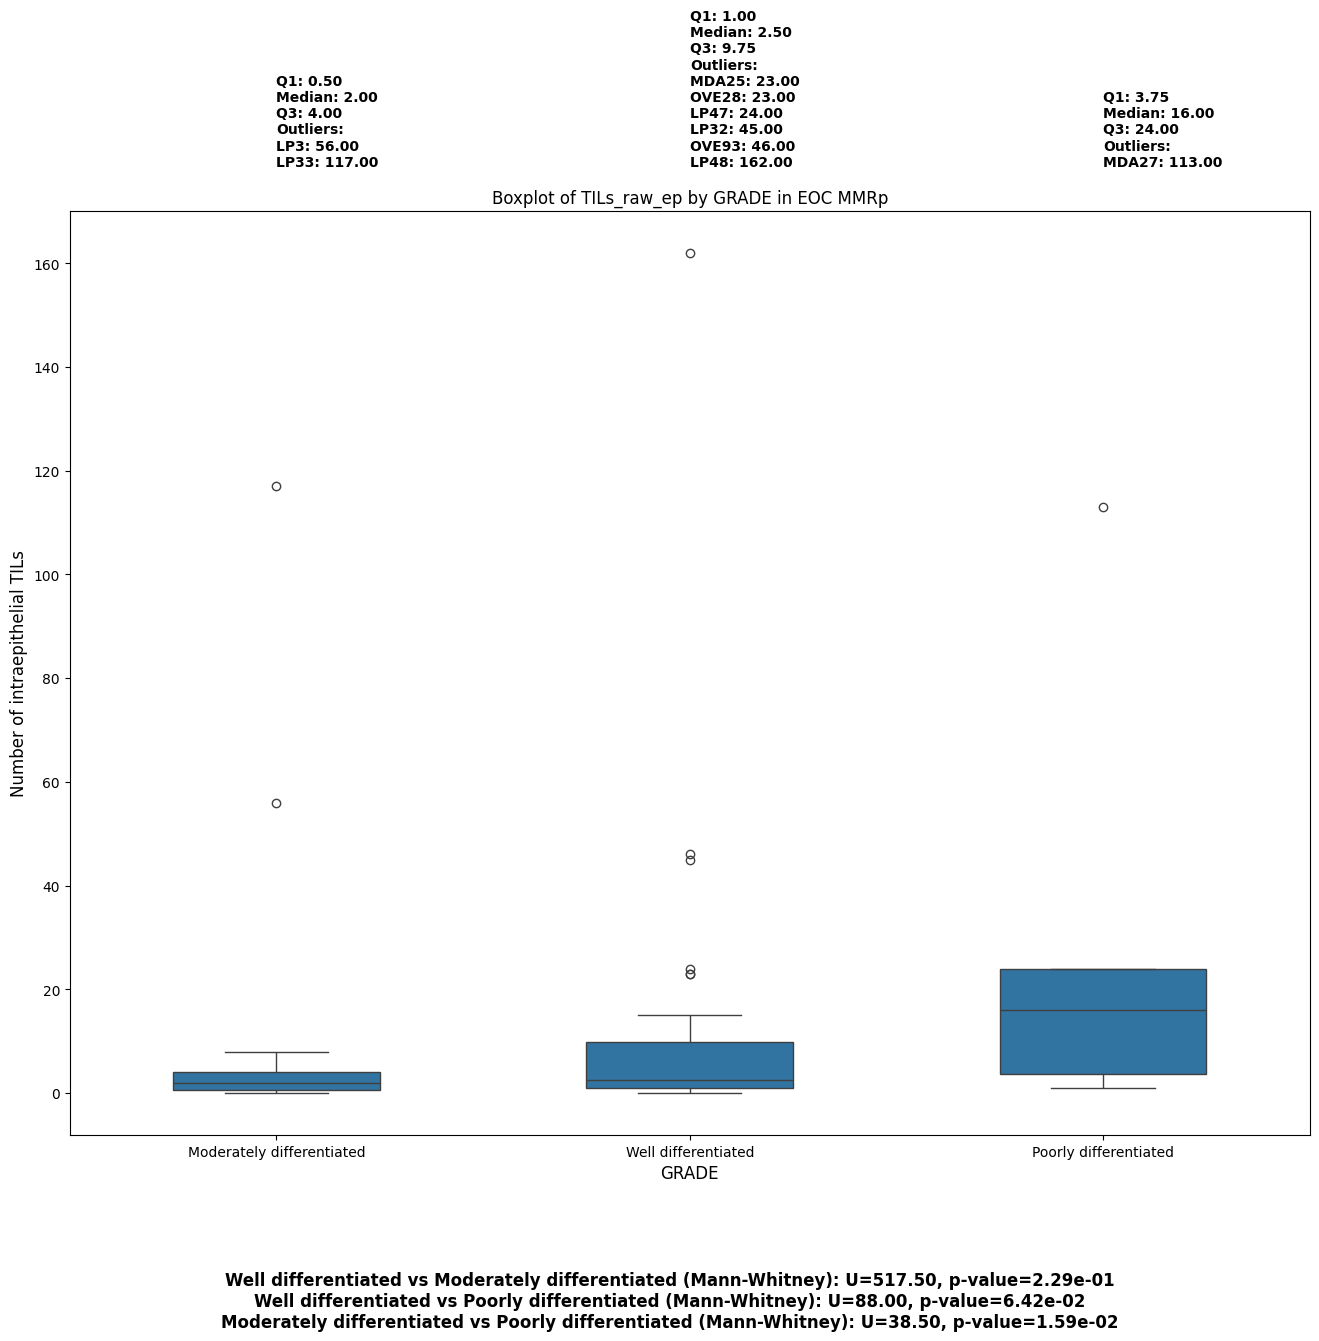

In [23]:
### Analyze statistics and distribution of TILs_raw_ep in each GRADE category in EOC MMRp group #######

# Uncomment to import the libraries if not done previously 
# import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

def analyze_and_plot(df, output_folder, output_file):
    # Filter out rows with NaN values in the GRADE column
    df = df[df['GRADE'].notna()]
    # Dictionary to store outlier statistics
    outliers_dict = {}
    
    sample_counts = df['GRADE'].value_counts().to_dict()
    print(f"Number of samples in each category:")
    for category, count in sample_counts.items():
        print(f"{category}: {count}")
    # Create a figure for the boxplot
    plt.figure(figsize=(16, 12))  # Increased size for better visibility
    sns.boxplot(x='GRADE', y='TILs_raw_ep', data=df, width=0.5)  # Adjust the width of the boxes
    
    # Variables to store data for each grade category
    tils_grade_well = []
    tils_grade_moderate = []
    tils_grade_poor = []

    for category in df['GRADE'].unique():
        # Filter data for the current category
        category_data = df[df['GRADE'] == category]

        # Calculate Q1, Q3, and median
        Q1 = category_data['TILs_raw_ep'].quantile(0.25)
        Q3 = category_data['TILs_raw_ep'].quantile(0.75)
        median = category_data['TILs_raw_ep'].median()
        IQR = Q3 - Q1
        
        # Define limits for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = category_data[(category_data['TILs_raw_ep'] < lower_bound) | 
                                 (category_data['TILs_raw_ep'] > upper_bound)]
        
        # Store outlier IDs and values
        outliers_dict[category] = {
            'Outlier_IDs': outliers['ID_CNIO'].tolist(),
            'Outlier_Values': outliers['TILs_raw_ep'].tolist(),
            'Q1': Q1,
            'Q3': Q3,
            'Median': median
        }
        
        # Add data to the corresponding lists
        if category == 'Well differentiated':
            tils_grade_well = category_data['TILs_raw_ep'].astype(float).dropna()
        elif category == 'Moderately differentiated':
            tils_grade_moderate = category_data['TILs_raw_ep'].astype(float).dropna()
        elif category == 'Poorly differentiated':
            tils_grade_poor = category_data['TILs_raw_ep'].astype(float).dropna()

    # Perform statistical tests
    # Combine lists for pairwise comparisons
    groups = {
        'Well differentiated': tils_grade_well,
        'Moderately differentiated': tils_grade_moderate,
        'Poorly differentiated': tils_grade_poor
    }

    test_results = {}
    categories = list(groups.keys())

    for i in range(len(categories)):
        for j in range(i + 1, len(categories)):
            cat_a = categories[i]
            cat_b = categories[j]
            data_a = groups[cat_a]
            data_b = groups[cat_b]

            if not data_a.empty and not data_b.empty:
                # Shapiro-Wilk normality test
                shapiro_a = shapiro(data_a)
                shapiro_b = shapiro(data_b)
                
                # Levene's test for homogeneity of variances
                levene_test = levene(data_a, data_b)
                
                # Select the appropriate test
                if shapiro_a.pvalue > 0.05 and shapiro_b.pvalue > 0.05 and levene_test.pvalue > 0.05:
                    # T-test
                    t_test = ttest_ind(data_a, data_b)
                    test_results[f"{cat_a} vs {cat_b} (T-test)"] = f"t={t_test.statistic:.2f}, p-value={t_test.pvalue:.2e}"
                else:
                    # Mann-Whitney U test
                    mannwhitney_test = mannwhitneyu(data_a, data_b, alternative='two-sided')
                    test_results[f"{cat_a} vs {cat_b} (Mann-Whitney)"] = f"U={mannwhitney_test.statistic:.2f}, p-value={mannwhitney_test.pvalue:.2e}"

    # Add the test results as text below the plot
    text_results = "\n".join([f"{comparison}: {result}" for comparison, result in test_results.items()])
    plt.figtext(0.5, -0.05, text_results, horizontalalignment='center', fontsize=12, color='black', weight='bold', ha='center')

    # Add text with outliers, Q1, Q3, and Median
    for category, stats in outliers_dict.items():
        sorted_outliers = sorted(zip(stats['Outlier_IDs'], stats['Outlier_Values']), key=lambda x: x[1])
        outlier_text = 'Outliers:\n' + '\n'.join([f'{id_}: {val:.2f}' for id_, val in sorted_outliers]) if stats['Outlier_Values'] else 'No Outliers'
        
        # Always include Q1, Median, and Q3 in the text box
        summary_stats_text = f"Q1: {stats['Q1']:.2f}\nMedian: {stats['Median']:.2f}\nQ3: {stats['Q3']:.2f}\n{outlier_text}"
        
        x_pos = df['GRADE'].unique().tolist().index(category)
        plt.gca().text(
            x=x_pos, 
            y=df['TILs_raw_ep'].max() + 0.1 * (df['TILs_raw_ep'].max() - df['TILs_raw_ep'].min()), 
            s=summary_stats_text,
            horizontalalignment='left', verticalalignment='bottom', 
            fontsize=10, color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )
    
    # Set title and labels for the plot
    plt.title('Boxplot of TILs_raw_ep by GRADE in EOC MMRp', fontsize=12)
    plt.xlabel('GRADE', fontsize=12)
    plt.ylabel('Number of intraepithelial TILs', fontsize=12)
    
    # Save the plot as a PDF file
    plt.savefig(f'{output_folder}/{output_file}', format='pdf', bbox_inches='tight')
    
    # Show the plot
    plt.show()

# Use
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_EOC_MMRp_TILs_raw_ep_by_GRADE.pdf'  
# Call the function
analyze_and_plot(df_eoc_mmrp, output_folder, output_file)

Number of samples in each category:
No: 99
Yes: 16
Shapiro-Wilk test for No: W=0.4673, p-value=0.0000
Shapiro-Wilk test for Yes: W=0.4059, p-value=0.0000
Levene's test: W=0.4407, p-value=0.5081


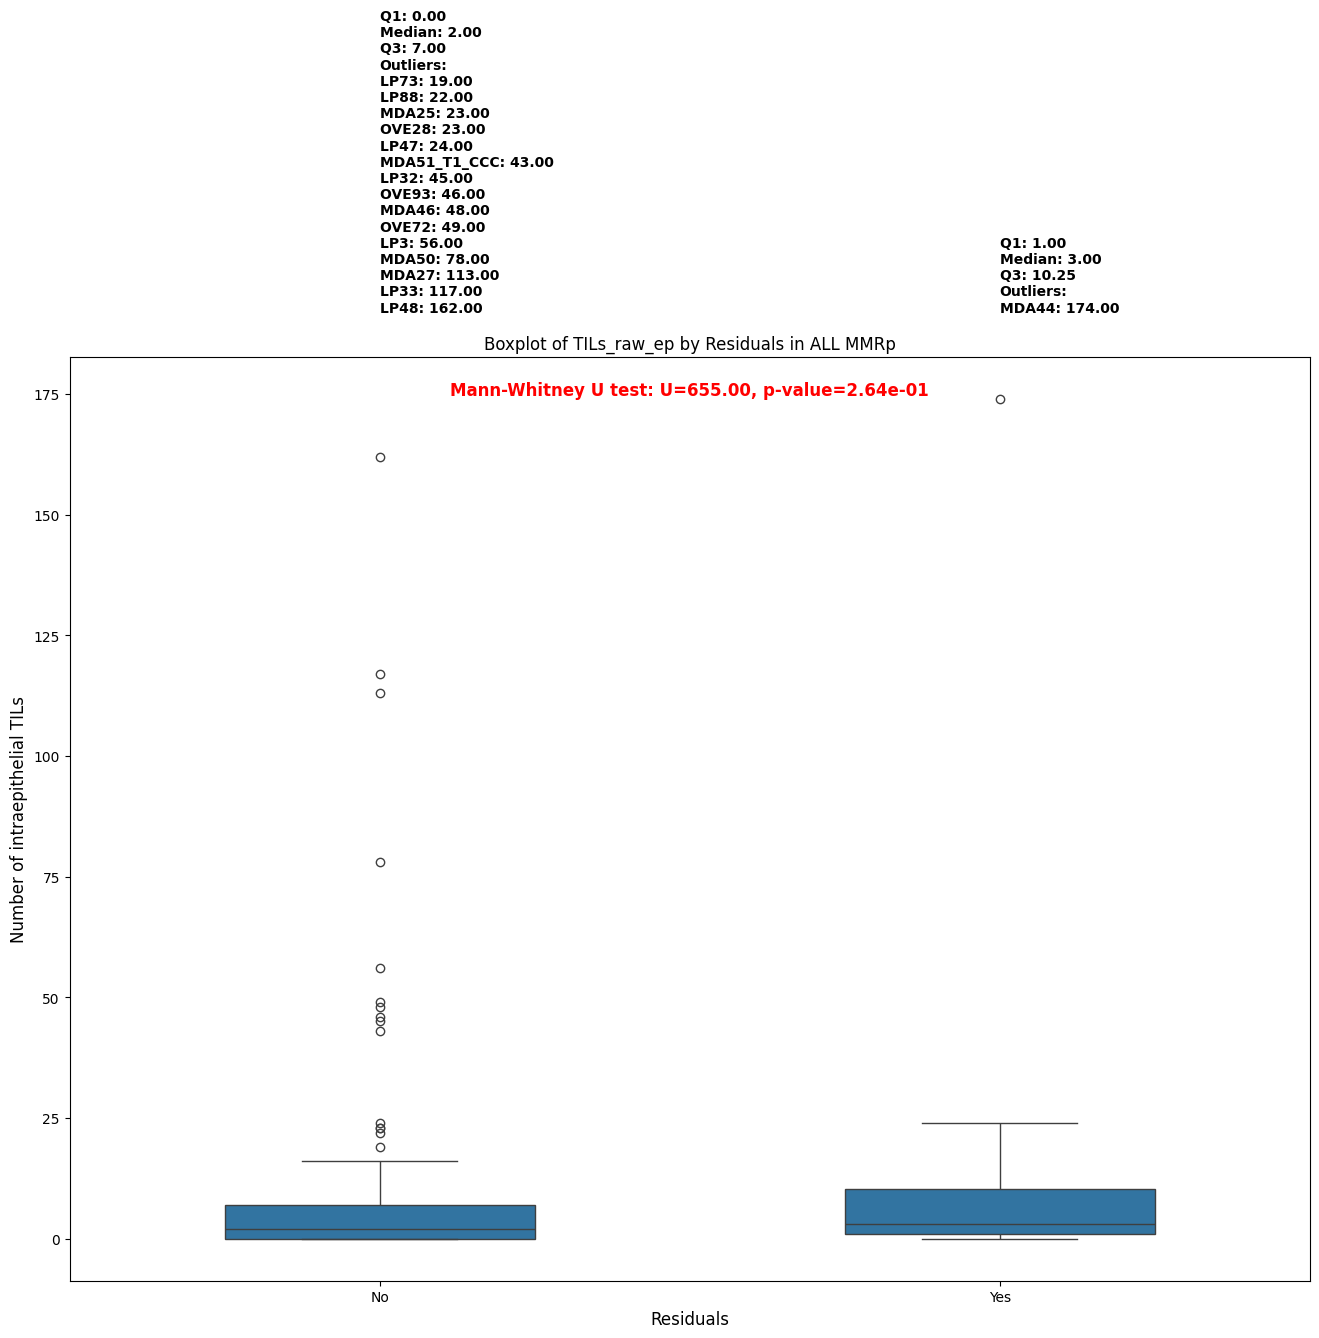

In [24]:
### Analyze statistics and distribution of TILs_raw_ep in each 'RESIDUALa' category in EOC+CC (MMRp group) #######

# Uncomment to import the libraries if not done previously 
# import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

def analyze_and_plot(df, output_folder, output_file):
    # Filter out rows with NaN values in the 'RESIDUALa' column
    df = df[df['RESIDUALa'].notna()]
    # Dictionary to store outlier statistics
    outliers_dict = {}
    
    sample_counts = df['RESIDUALa'].value_counts().to_dict()
    print(f"Number of samples in each category:")
    for category, count in sample_counts.items():
        print(f"{category}: {count}")
        

    # Create a figure for the boxplot
    plt.figure(figsize=(16, 12))  # Increased size for better visibility
    sns.boxplot(x='RESIDUALa', y='TILs_raw_ep', data=df, width=0.5)  # Adjust the width of the boxes
    
    # Variables to store data for 'No' and 'Yes'
    tils_residual_no = []
    tils_residual_yes = []

    for category in df['RESIDUALa'].unique():
        # Filter data for the current category
        category_data = df[df['RESIDUALa'] == category]

        # Calculate Q1, Q3, and median
        Q1 = category_data['TILs_raw_ep'].quantile(0.25)
        Q3 = category_data['TILs_raw_ep'].quantile(0.75)
        median = category_data['TILs_raw_ep'].median()
        IQR = Q3 - Q1
        
        # Define limits for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = category_data[(category_data['TILs_raw_ep'] < lower_bound) | 
                                 (category_data['TILs_raw_ep'] > upper_bound)]
        
        # Store outlier IDs and values
        outliers_dict[category] = {
            'Outlier_IDs': outliers['ID_CNIO'].tolist(),
            'Outlier_Values': outliers['TILs_raw_ep'].tolist(),
            'Q1': Q1,
            'Q3': Q3,
            'Median': median
        }
        
        # Add data to the corresponding lists
        if category == 'No':
            tils_residual_no = category_data['TILs_raw_ep'].astype(float).dropna()
        elif category == 'Yes':
            tils_residual_yes = category_data['TILs_raw_ep'].astype(float).dropna()

    # Perform statistical tests if both lists contain data
    if not tils_residual_no.empty and not tils_residual_yes.empty:
        # Shapiro-Wilk normality test
        shapiro_no = shapiro(tils_residual_no)
        shapiro_yes = shapiro(tils_residual_yes)
        print(f"Shapiro-Wilk test for No: W={shapiro_no.statistic:.4f}, p-value={shapiro_no.pvalue:.4f}")
        print(f"Shapiro-Wilk test for Yes: W={shapiro_yes.statistic:.4f}, p-value={shapiro_yes.pvalue:.4f}")
        
        # Levene's test for homogeneity of variances
        levene_test = levene(tils_residual_no, tils_residual_yes)
        print(f"Levene's test: W={levene_test.statistic:.4f}, p-value={levene_test.pvalue:.4f}")
        
        # Select the appropriate test
        if shapiro_no.pvalue > 0.05 and shapiro_yes.pvalue > 0.05 and levene_test.pvalue > 0.05:
            # T-test
            t_test = ttest_ind(tils_residual_no, tils_residual_yes)
            test_result = f"T-test: t={t_test.statistic:.2f}, p-value={t_test.pvalue:.2e}"
        else:
            # Mann-Whitney U test
            mannwhitney_test = mannwhitneyu(tils_residual_no, tils_residual_yes, alternative='two-sided')
            test_result = f"Mann-Whitney U test: U={mannwhitney_test.statistic:.2f}, p-value={mannwhitney_test.pvalue:.2e}"
        
        # Add the test result to the plot
        plt.gca().text(
            x=0.5, y=df['TILs_raw_ep'].max(), 
            s=test_result,
            horizontalalignment='center', verticalalignment='bottom', 
            fontsize=12, color='red', 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )

    # Add text with outliers, Q1, Q3, and Median
    for category, stats in outliers_dict.items():
        sorted_outliers = sorted(zip(stats['Outlier_IDs'], stats['Outlier_Values']), key=lambda x: x[1])
        outlier_text = 'Outliers:\n' + '\n'.join([f'{id_}: {val:.2f}' for id_, val in sorted_outliers]) if stats['Outlier_Values'] else 'No Outliers'
        
        # Always include Q1, Median, and Q3 in the text box
        summary_stats_text = f"Q1: {stats['Q1']:.2f}\nMedian: {stats['Median']:.2f}\nQ3: {stats['Q3']:.2f}\n{outlier_text}"
        
        x_pos = list(df['RESIDUALa'].unique()).index(category)
        plt.gca().text(
            x=x_pos, 
            y=df['TILs_raw_ep'].max() + 0.1 * (df['TILs_raw_ep'].max() - df['TILs_raw_ep'].min()), 
            s=summary_stats_text,
            horizontalalignment='left', verticalalignment='bottom', 
            fontsize=10, color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )
    
    # Set title and labels for the plot
    plt.title('Boxplot of TILs_raw_ep by Residuals in ALL MMRp', fontsize=12)
    plt.xlabel('Residuals', fontsize=12)
    plt.ylabel('Number of intraepithelial TILs', fontsize=12)
    
    # Save the plot as a PDF file
    plt.savefig(f'{output_folder}/{output_file}', format='pdf', bbox_inches='tight')
    
    # Show the plot
    plt.show()

# Use
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_ALL_MMRp_TILs_raw_ep_by_RESIDUALa.pdf'  
# Call the function
analyze_and_plot(df_all_mmrp, output_folder, output_file)

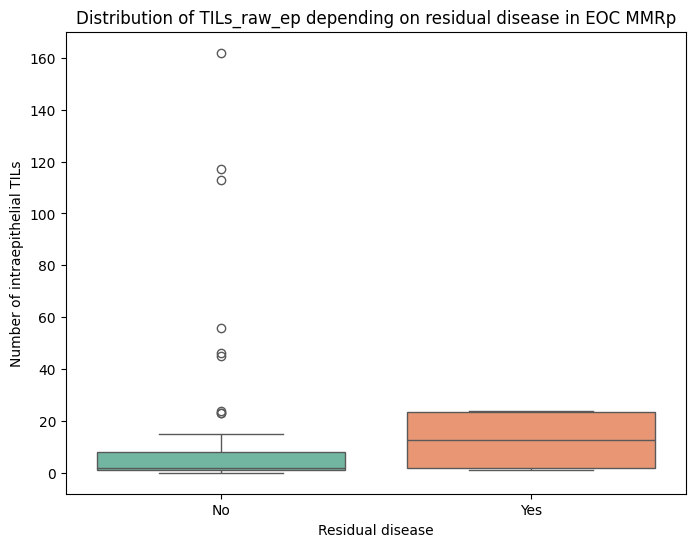

In [25]:
##### EXPLORE RELATIONSHIP BETWEEN RESIDUALa AND TILs_raw_ep in EOC MMRp #############

# Simple boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x='RESIDUALa', y='TILs_raw_ep', data=df_eoc_mmrp, hue='RESIDUALa', legend=False,palette='Set2')

# Add title and labels
plt.title('Distribution of TILs_raw_ep depending on residual disease in EOC MMRp')
plt.xlabel('Residual disease')
plt.ylabel('Number of intraepithelial TILs')

# Show the plot
plt.show()


Text(0.5, 0, 'Residual disease')

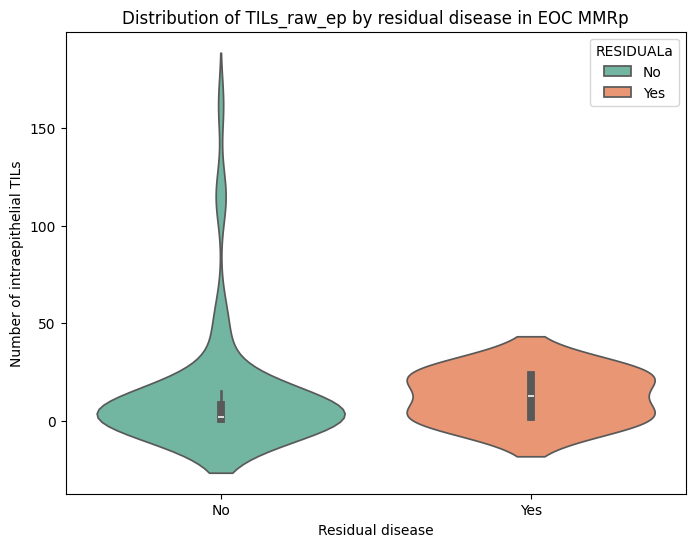

In [26]:
##### Violin plot ###########
plt.figure(figsize=(8, 6))
# Add title and labels
plt.title('Distribution of TILs_raw_ep by residual disease in EOC MMRp')
sns.violinplot(x='RESIDUALa', y='TILs_raw_ep', data=df_eoc_mmrp, hue='RESIDUALa', palette='Set2')
plt.ylabel('Number of intraepithelial TILs')
plt.xlabel('Residual disease')

Number of samples in each category:
No: 59
Yes: 4
Shapiro-Wilk test for No: W=0.4607, p-value=0.0000
Shapiro-Wilk test for Yes: W=0.7680, p-value=0.0562
Levene's test: W=0.0054, p-value=0.9416


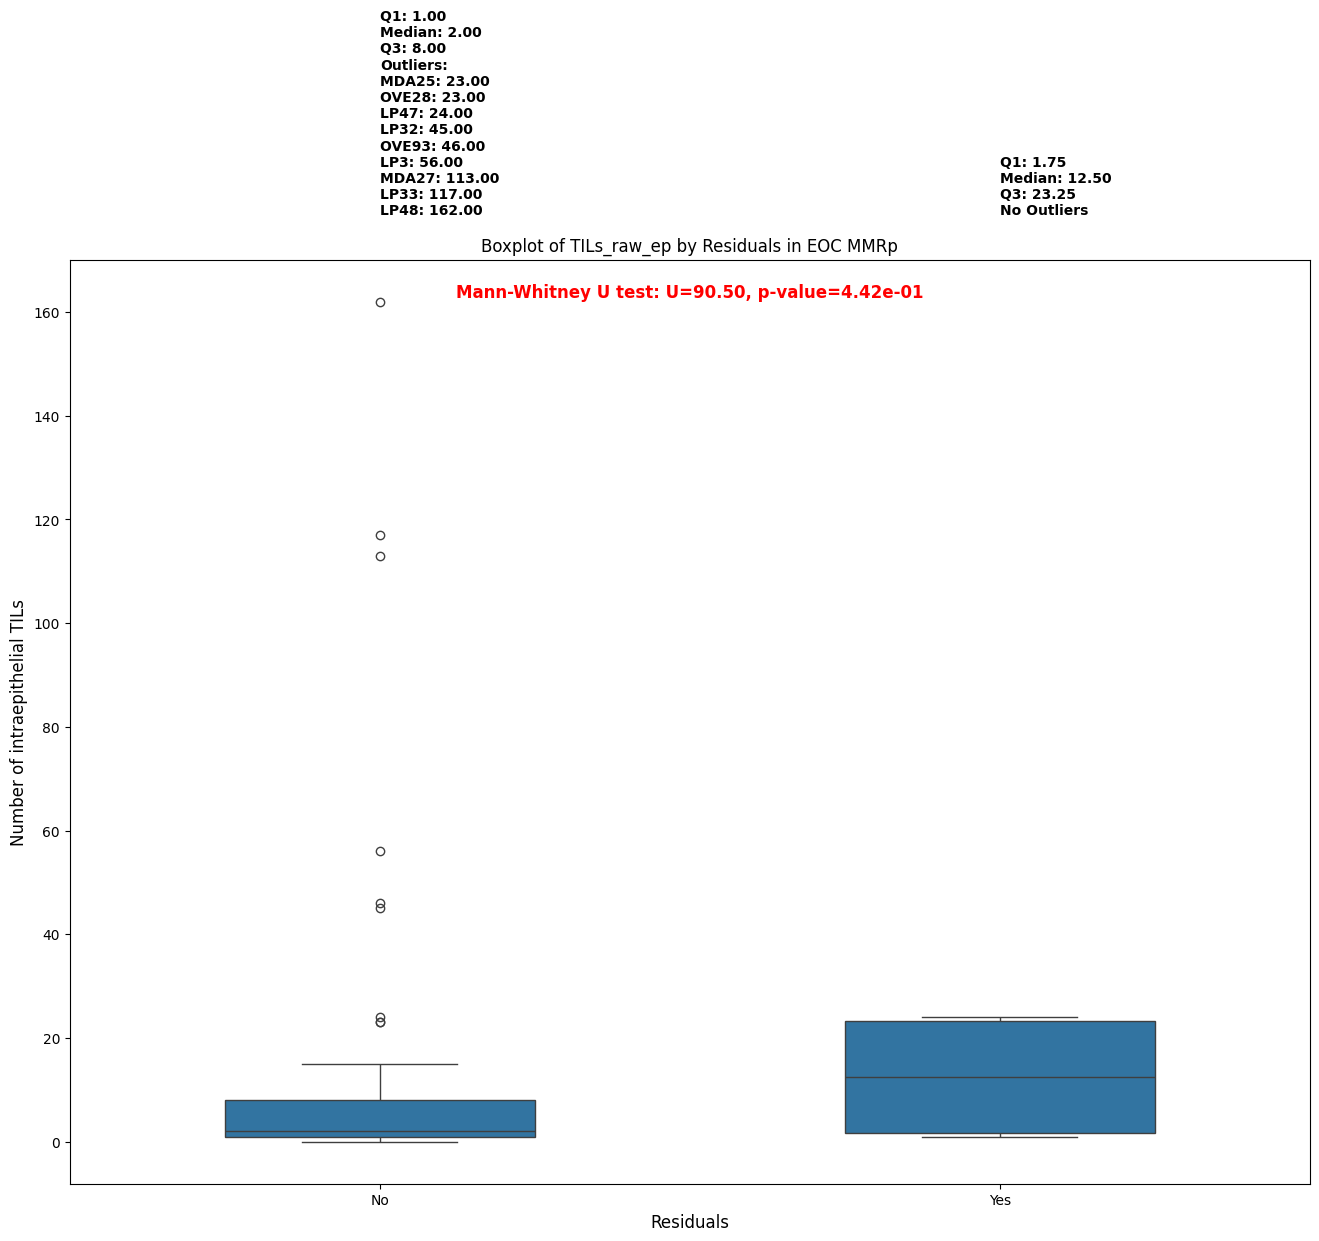

In [27]:
### Analyze statistics and distribution of TILs_raw_ep in each 'RESIDUALa' category in EOC (MMRp group) #######

# Uncomment to import the libraries if not done previously 
# import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

def analyze_and_plot(df, output_folder, output_file):
    # Filter out rows with NaN values in the 'RESIDUALa' column
    df = df[df['RESIDUALa'].notna()]
    # Dictionary to store outlier statistics
    outliers_dict = {}

    sample_counts = df['RESIDUALa'].value_counts().to_dict()
    print(f"Number of samples in each category:")
    for category, count in sample_counts.items():
        print(f"{category}: {count}")
        
    # Create a figure for the boxplot
    plt.figure(figsize=(16, 12))  # Increased size for better visibility
    sns.boxplot(x='RESIDUALa', y='TILs_raw_ep', data=df, width=0.5)  # Adjust the width of the boxes
    
    # Variables to store data for 'No' and 'Yes'
    tils_residual_no = []
    tils_residual_yes = []

    for category in df['RESIDUALa'].unique():
        # Filter data for the current category
        category_data = df[df['RESIDUALa'] == category]

        # Calculate Q1, Q3, and median
        Q1 = category_data['TILs_raw_ep'].quantile(0.25)
        Q3 = category_data['TILs_raw_ep'].quantile(0.75)
        median = category_data['TILs_raw_ep'].median()
        IQR = Q3 - Q1
        
        # Define limits for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = category_data[(category_data['TILs_raw_ep'] < lower_bound) | 
                                 (category_data['TILs_raw_ep'] > upper_bound)]
        
        # Store outlier IDs and values
        outliers_dict[category] = {
            'Outlier_IDs': outliers['ID_CNIO'].tolist(),
            'Outlier_Values': outliers['TILs_raw_ep'].tolist(),
            'Q1': Q1,
            'Q3': Q3,
            'Median': median
        }
        
        # Add data to the corresponding lists
        if category == 'No':
            tils_residual_no = category_data['TILs_raw_ep'].astype(float).dropna()
        elif category == 'Yes':
            tils_residual_yes = category_data['TILs_raw_ep'].astype(float).dropna()

    # Perform statistical tests
    if not tils_residual_no.empty and not tils_residual_yes.empty:
        # Shapiro-Wilk normality test
        shapiro_no = shapiro(tils_residual_no)
        shapiro_yes = shapiro(tils_residual_yes)
        print(f"Shapiro-Wilk test for No: W={shapiro_no.statistic:.4f}, p-value={shapiro_no.pvalue:.4f}")
        print(f"Shapiro-Wilk test for Yes: W={shapiro_yes.statistic:.4f}, p-value={shapiro_yes.pvalue:.4f}")
        
        # Levene's test for homogeneity of variances
        levene_test = levene(tils_residual_no, tils_residual_yes)
        print(f"Levene's test: W={levene_test.statistic:.4f}, p-value={levene_test.pvalue:.4f}")
        
        # Select the appropriate test
        if shapiro_no.pvalue > 0.05 and shapiro_yes.pvalue > 0.05 and levene_test.pvalue > 0.05:
            # T-test
            t_test = ttest_ind(tils_residual_no, tils_residual_yes)
            test_result = f"T-test: t={t_test.statistic:.2f}, p-value={t_test.pvalue:.2e}"  # .2e for scientific notation
        else:
            # Mann-Whitney U test
            mannwhitney_test = mannwhitneyu(tils_residual_no, tils_residual_yes, alternative='two-sided')
            test_result = f"Mann-Whitney U test: U={mannwhitney_test.statistic:.2f}, p-value={mannwhitney_test.pvalue:.2e}"
        
        # Add the test result to the plot
        plt.gca().text(
            x=0.5, y=df['TILs_raw_ep'].max(), 
            s=test_result,
            horizontalalignment='center', verticalalignment='bottom', 
            fontsize=12, color='red', 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )

    # Add text with outliers, Q1, Q3, and Median
    for category, stats in outliers_dict.items():
        sorted_outliers = sorted(zip(stats['Outlier_IDs'], stats['Outlier_Values']), key=lambda x: x[1])
        outlier_text = 'Outliers:\n' + '\n'.join([f'{id_}: {val:.2f}' for id_, val in sorted_outliers]) if stats['Outlier_Values'] else 'No Outliers'
        
        # Always include Q1, Median, and Q3 in the text box
        summary_stats_text = f"Q1: {stats['Q1']:.2f}\nMedian: {stats['Median']:.2f}\nQ3: {stats['Q3']:.2f}\n{outlier_text}"
        
        x_pos = df['RESIDUALa'].unique().tolist().index(category)
        plt.gca().text(
            x=x_pos, 
            y=df['TILs_raw_ep'].max() + 0.1 * (df['TILs_raw_ep'].max() - df['TILs_raw_ep'].min()), 
            s=summary_stats_text,
            horizontalalignment='left', verticalalignment='bottom', 
            fontsize=10, color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )
    
    # Set title and labels for the plot
    plt.title('Boxplot of TILs_raw_ep by Residuals in EOC MMRp', fontsize=12)
    plt.xlabel('Residuals', fontsize=12)
    plt.ylabel('Number of intraepithelial TILs', fontsize=12)
    
    # Save the plot as a PDF file
    plt.savefig(f'{output_folder}/{output_file}', format='pdf', bbox_inches='tight')
    
    # Show the plot
    plt.show()

# Use
output_folder = 'Plots_Individual_Descriptive_Analysis/Integrated_analysis_reclassified/'
output_file = 'Boxplot_EOC_MMRp_TILs_raw_ep_by_RESIDUALa.pdf'  
# Call the function
analyze_and_plot(df_eoc_mmrp, output_folder, output_file)

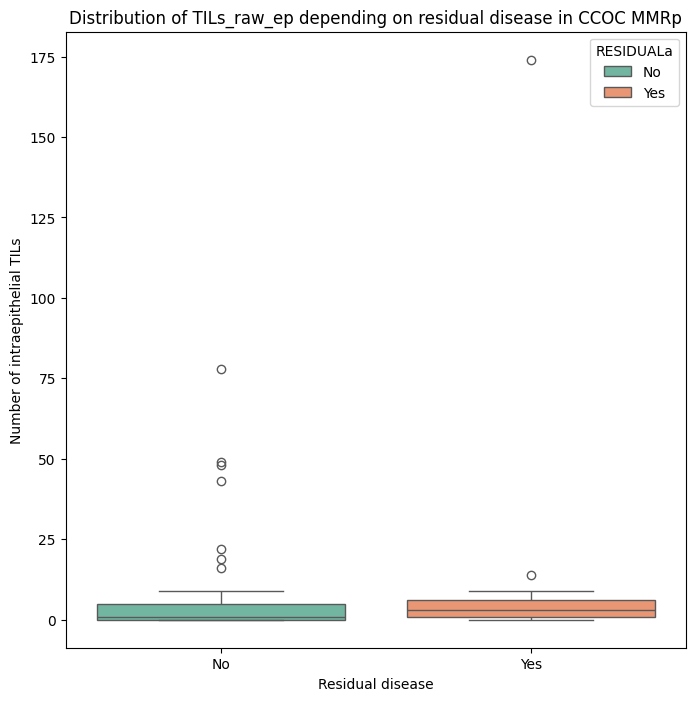

In [30]:
##### EXPLORE RELATIONSHIP BETWEEN RESIDUALa AND TILs_raw_ep in CCOC MMRp #############

# Simple boxplots
plt.figure(figsize=(8, 8))
sns.boxplot(x='RESIDUALa', y='TILs_raw_ep', data=df_cc_mmrp, hue='RESIDUALa', palette='Set2')

# Add title and labels
plt.title('Distribution of TILs_raw_ep depending on residual disease in CCOC MMRp')
plt.xlabel('Residual disease')
plt.ylabel('Number of intraepithelial TILs')

# Show the plot
plt.show()

Text(0.5, 0, 'Residual disease')

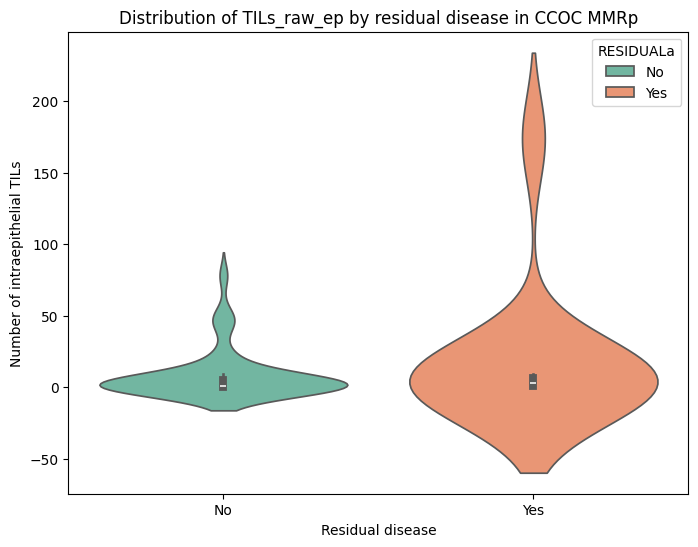

In [29]:
# Violinplot
plt.figure(figsize=(8, 6))
# Add title and labels
plt.title('Distribution of TILs_raw_ep by residual disease in CCOC MMRp')
sns.violinplot(x='RESIDUALa', y='TILs_raw_ep', data=df_cc_mmrp, hue='RESIDUALa', palette='Set2')
plt.ylabel('Number of intraepithelial TILs')
plt.xlabel('Residual disease')

Number of samples in each category:
No: 40
Yes: 12
Shapiro-Wilk test for No: W=0.5410, p-value=0.0000
Shapiro-Wilk test for Yes: W=0.3923, p-value=0.0000
Levene's test: W=1.0129, p-value=0.3191


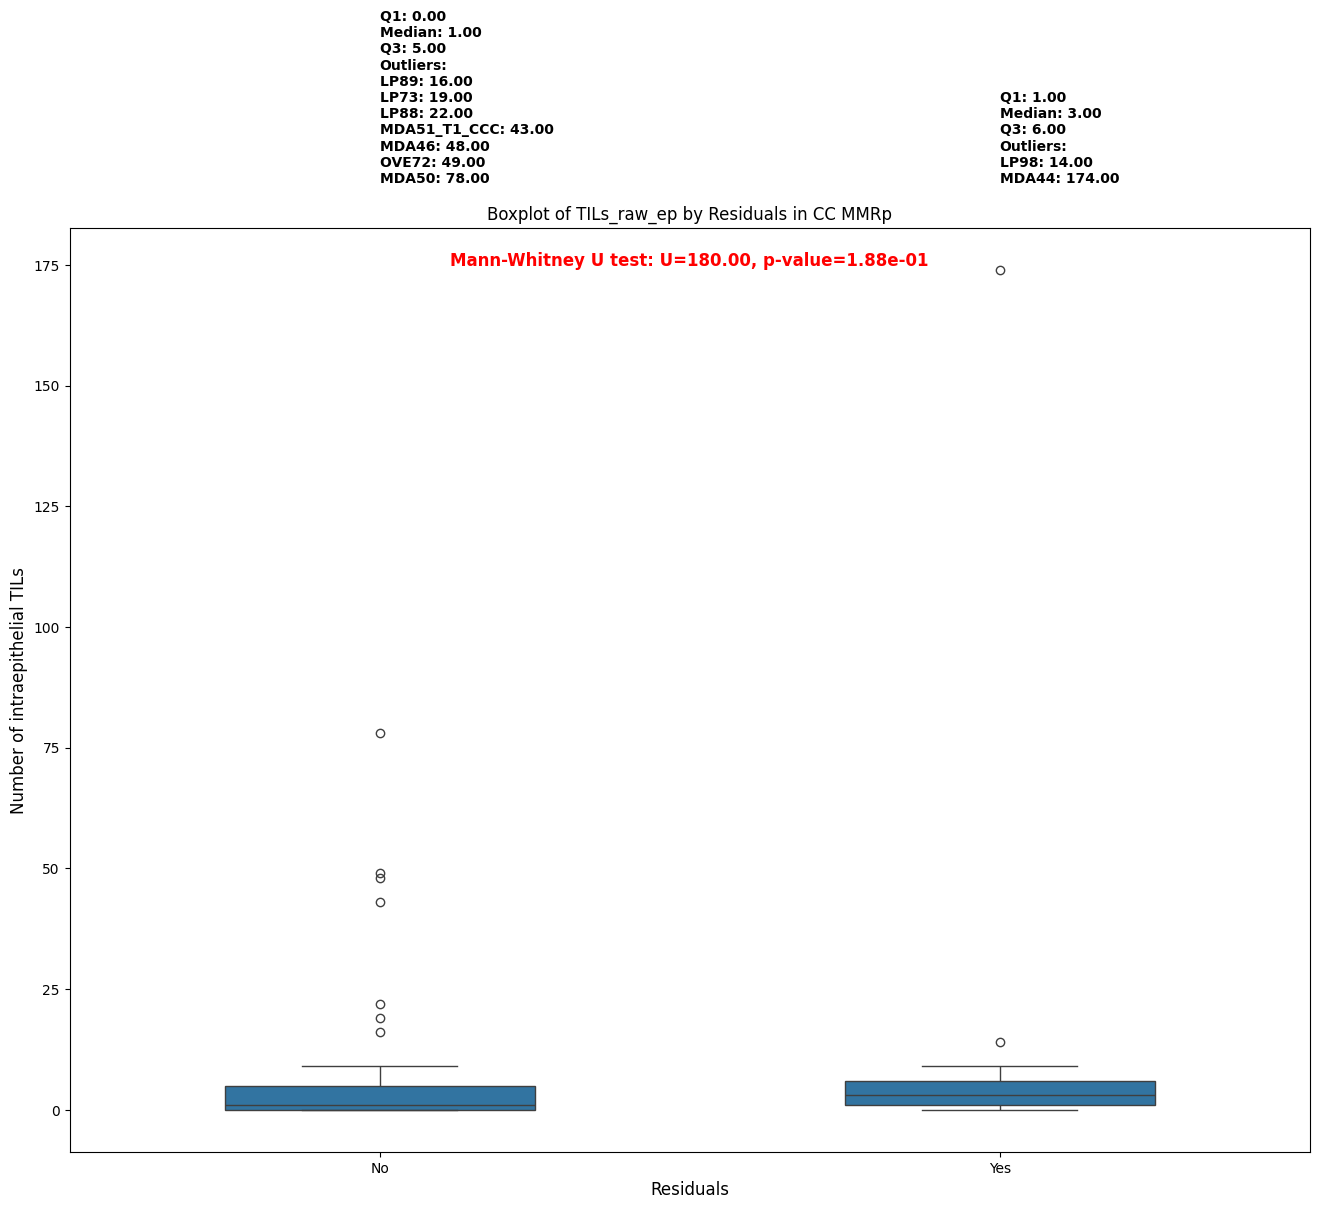

In [31]:
### Analyze statistics and distribution of TILs_raw_ep in each 'RESIDUALa' category in CCOC (MMRp group) #######

# Uncomment to import the libraries if not done previously 
# import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

def analyze_and_plot(df, output_folder, output_file):
    # Filter out rows with NaN values in the 'RESIDUALa' column
    df = df[df['RESIDUALa'].notna()]
    # Dictionary to store outlier statistics
    outliers_dict = {}
    # Count the number of samples
    sample_counts = df['RESIDUALa'].value_counts().to_dict()
    print(f"Number of samples in each category:")
    for category, count in sample_counts.items():
        print(f"{category}: {count}")
    # Create a figure for the boxplot
    plt.figure(figsize=(16, 12))  # Increased size for better visibility
    sns.boxplot(x='RESIDUALa', y='TILs_raw_ep', data=df, width=0.5)  # Adjust the width of the boxes
    
    # Variables to store data for 'No' and 'Yes'
    tils_residual_no = []
    tils_residual_yes = []

    for category in df['RESIDUALa'].unique():
        # Filter data for the current category
        category_data = df[df['RESIDUALa'] == category]

        # Calculate Q1, Q3, and median
        Q1 = category_data['TILs_raw_ep'].quantile(0.25)
        Q3 = category_data['TILs_raw_ep'].quantile(0.75)
        median = category_data['TILs_raw_ep'].median()
        IQR = Q3 - Q1
        
        # Define limits for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = category_data[(category_data['TILs_raw_ep'] < lower_bound) | 
                                 (category_data['TILs_raw_ep'] > upper_bound)]
        
        # Store outlier IDs and values
        outliers_dict[category] = {
            'Outlier_IDs': outliers['ID_CNIO'].tolist(),
            'Outlier_Values': outliers['TILs_raw_ep'].tolist(),
            'Q1': Q1,
            'Q3': Q3,
            'Median': median
        }
        
        # Add data to the corresponding lists
        if category == 'No':
            tils_residual_no = category_data['TILs_raw_ep'].astype(float).dropna()
        elif category == 'Yes':
            tils_residual_yes = category_data['TILs_raw_ep'].astype(float).dropna()

    # Perform statistical tests
    if not tils_residual_no.empty and not tils_residual_yes.empty:
        # Shapiro-Wilk normality test
        shapiro_no = shapiro(tils_residual_no)
        shapiro_yes = shapiro(tils_residual_yes)
        print(f"Shapiro-Wilk test for No: W={shapiro_no.statistic:.4f}, p-value={shapiro_no.pvalue:.4f}")
        print(f"Shapiro-Wilk test for Yes: W={shapiro_yes.statistic:.4f}, p-value={shapiro_yes.pvalue:.4f}")
        
        # Levene's test for homogeneity of variances
        levene_test = levene(tils_residual_no, tils_residual_yes)
        print(f"Levene's test: W={levene_test.statistic:.4f}, p-value={levene_test.pvalue:.4f}")
        
        # Select the appropriate test
        if shapiro_no.pvalue > 0.05 and shapiro_yes.pvalue > 0.05 and levene_test.pvalue > 0.05:
            # T-test
            t_test = ttest_ind(tils_residual_no, tils_residual_yes)
            test_result = f"T-test: t={t_test.statistic:.2f}, p-value={t_test.pvalue:.2e}"  # .2e for scientific notation
        else:
            # Mann-Whitney U test
            mannwhitney_test = mannwhitneyu(tils_residual_no, tils_residual_yes, alternative='two-sided')
            test_result = f"Mann-Whitney U test: U={mannwhitney_test.statistic:.2f}, p-value={mannwhitney_test.pvalue:.2e}"
        
        # Add the test result to the plot
        plt.gca().text(
            x=0.5, y=df['TILs_raw_ep'].max(), 
            s=test_result,
            horizontalalignment='center', verticalalignment='bottom', 
            fontsize=12, color='red', 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )

    # Add text with outliers, Q1, Q3, and Median
    for category, stats in outliers_dict.items():
        sorted_outliers = sorted(zip(stats['Outlier_IDs'], stats['Outlier_Values']), key=lambda x: x[1])
        outlier_text = 'Outliers:\n' + '\n'.join([f'{id_}: {val:.2f}' for id_, val in sorted_outliers]) if stats['Outlier_Values'] else 'No Outliers'
        
        # Always include Q1, Median, and Q3 in the text box
        summary_stats_text = f"Q1: {stats['Q1']:.2f}\nMedian: {stats['Median']:.2f}\nQ3: {stats['Q3']:.2f}\n{outlier_text}"
        
        x_pos = df['RESIDUALa'].unique().tolist().index(category)
        plt.gca().text(
            x=x_pos, 
            y=df['TILs_raw_ep'].max() + 0.1 * (df['TILs_raw_ep'].max() - df['TILs_raw_ep'].min()), 
            s=summary_stats_text,
            horizontalalignment='left', verticalalignment='bottom', 
            fontsize=10, color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )
    
    # Set title and labels for the plot
    plt.title('Boxplot of TILs_raw_ep by Residuals in CC MMRp', fontsize=12)
    plt.xlabel('Residuals', fontsize=12)
    plt.ylabel('Number of intraepithelial TILs', fontsize=12)
    
    # Save the plot as a PDF file
    plt.savefig(f'{output_folder}/{output_file}', format='pdf', bbox_inches='tight')
    
    # Show the plot
    plt.show()

# End of the function
# Usage
output_folder = 'Plots_Individual_Descriptive_Analysis/Integrated_analysis_reclassified/'
output_file = 'Boxplot_CCOC_MMRp_TILs_raw_ep_by_RESIDUALa.pdf'  

analyze_and_plot(df_cc_mmrp, output_folder, output_file)


In [33]:
#### ANALYSE MMRd SAMPLES. ONLY WE ANALYZE EOC BECAUSE IN CCOC WE ONLY HAVE 5 CASES ##################
### Scatter plot
# Filter the dataframe where the 'MMR_final_status' column is 'MMRd'
df_mmrd= df[df['MMR_final_status'] == 'MMRd']
print(f"Number of MMRd samples with TILs raw counts: {len(df_mmrd)}")

Number of MMRd samples with TILs raw counts: 15


Number of EOC MMRd samples with TILs_raw_ep data: 10


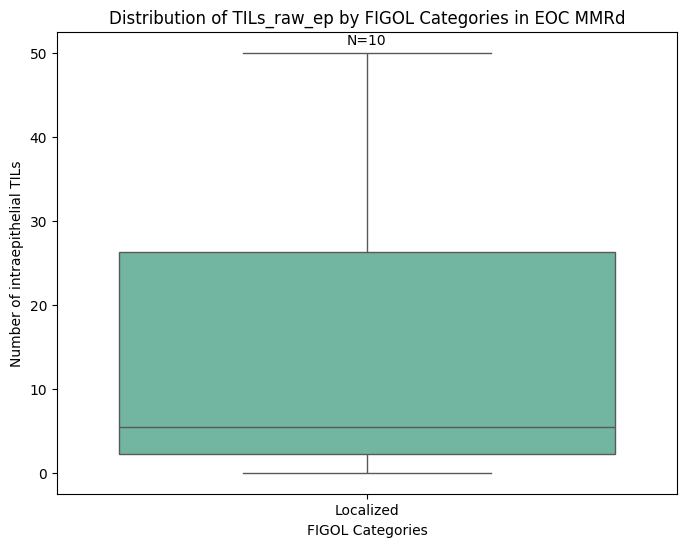

In [34]:
### ANALYSE EOC MMRd SAMPLES DISTRIBUTION IN FIGOL CATEGORIES ##############

# Step 1: Filter the DataFrame for HISTOLOGY == 'EOC'
df_eoc_mmrd = df_mmrd[df_mmrd['HISTOLOGY'] == 'EOC']
print("Number of EOC MMRd samples with TILs_raw_ep data:",len(df_eoc_mmrd))

# Step 2: Drop rows where FIGOL is NaN
df_eoc_mmrd = df_eoc_mmrd.dropna(subset=['FIGOL'])

# Step 3: Count the number of samples in each category
category_counts = df_eoc_mmrd['FIGOL'].value_counts()

# Step 4: Create a boxplot to visualize the distribution of TILs_raw_ep
plt.figure(figsize=(8, 6))
sns.boxplot(x='FIGOL', y='TILs_raw_ep', data=df_eoc_mmrd, hue='FIGOL',palette='Set2',legend=False)

# Step 5: Add title and labels
plt.title('Distribution of TILs_raw_ep by FIGOL Categories in EOC MMRd')
plt.xlabel('FIGOL Categories')
plt.ylabel('Number of intraepithelial TILs')

# Step 6: Annotate the number of samples on the boxplot
for i, count in enumerate(category_counts):
    plt.text(i, df_eoc_mmrd['TILs_raw_ep'].max() + 1, f'N={count}', 
             horizontalalignment='center', fontsize=10, color='black')

# Show the plot
plt.show()
### All EOC MMRd samples are localized according FIGO stage

<Axes: title={'center': 'Distribution of TILs_raw_ep by FIGO stage in EOC MMRd'}, xlabel='FIGOL', ylabel='TILs_raw_ep'>

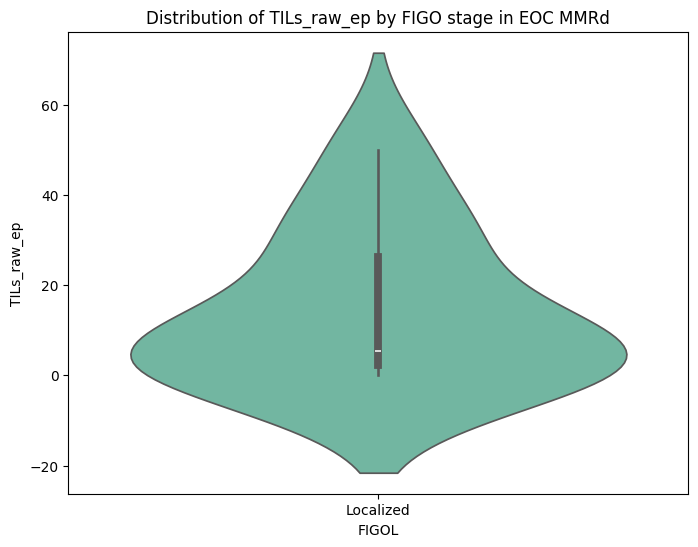

In [35]:
plt.figure(figsize=(8, 6))
# Add title and labels
plt.title('Distribution of TILs_raw_ep by FIGO stage in EOC MMRd')
sns.violinplot(x='FIGOL', y='TILs_raw_ep', data=df_eoc_mmrd, hue='FIGOL', palette='Set2')

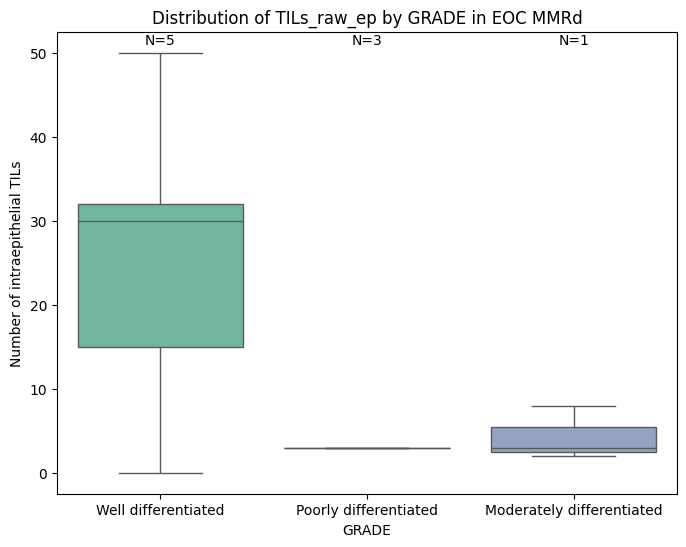

In [36]:
### ANALYSE EOC MMRd SAMPLES DISTRIBUTION IN GRADES #############

# Count the number of samples in each category
category_counts = df_eoc_mmrd['GRADE'].value_counts()

# Create a boxplot to visualize the distribution of TILs_raw_ep
plt.figure(figsize=(8, 6))
sns.boxplot(x='GRADE', y='TILs_raw_ep', data=df_eoc_mmrd, hue='GRADE',palette='Set2',legend=False)

# Add title and labels
plt.title('Distribution of TILs_raw_ep by GRADE in EOC MMRd')
plt.xlabel('GRADE')
plt.ylabel('Number of intraepithelial TILs')

# Annotate the number of samples on the boxplot
for i, (grade, count) in enumerate(category_counts.items()):
    plt.text(i, df_eoc_mmrd['TILs_raw_ep'].max() + 1, f'N={count}', 
             horizontalalignment='center', fontsize=10, color='black')

# Show the plot
plt.show()

Number of samples in each category:
Well differentiated: 5
Moderately differentiated: 3
Poorly differentiated: 1


/tmp/ipykernel_5879/2082339586.py:83: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  shapiro_b = shapiro(data_b)


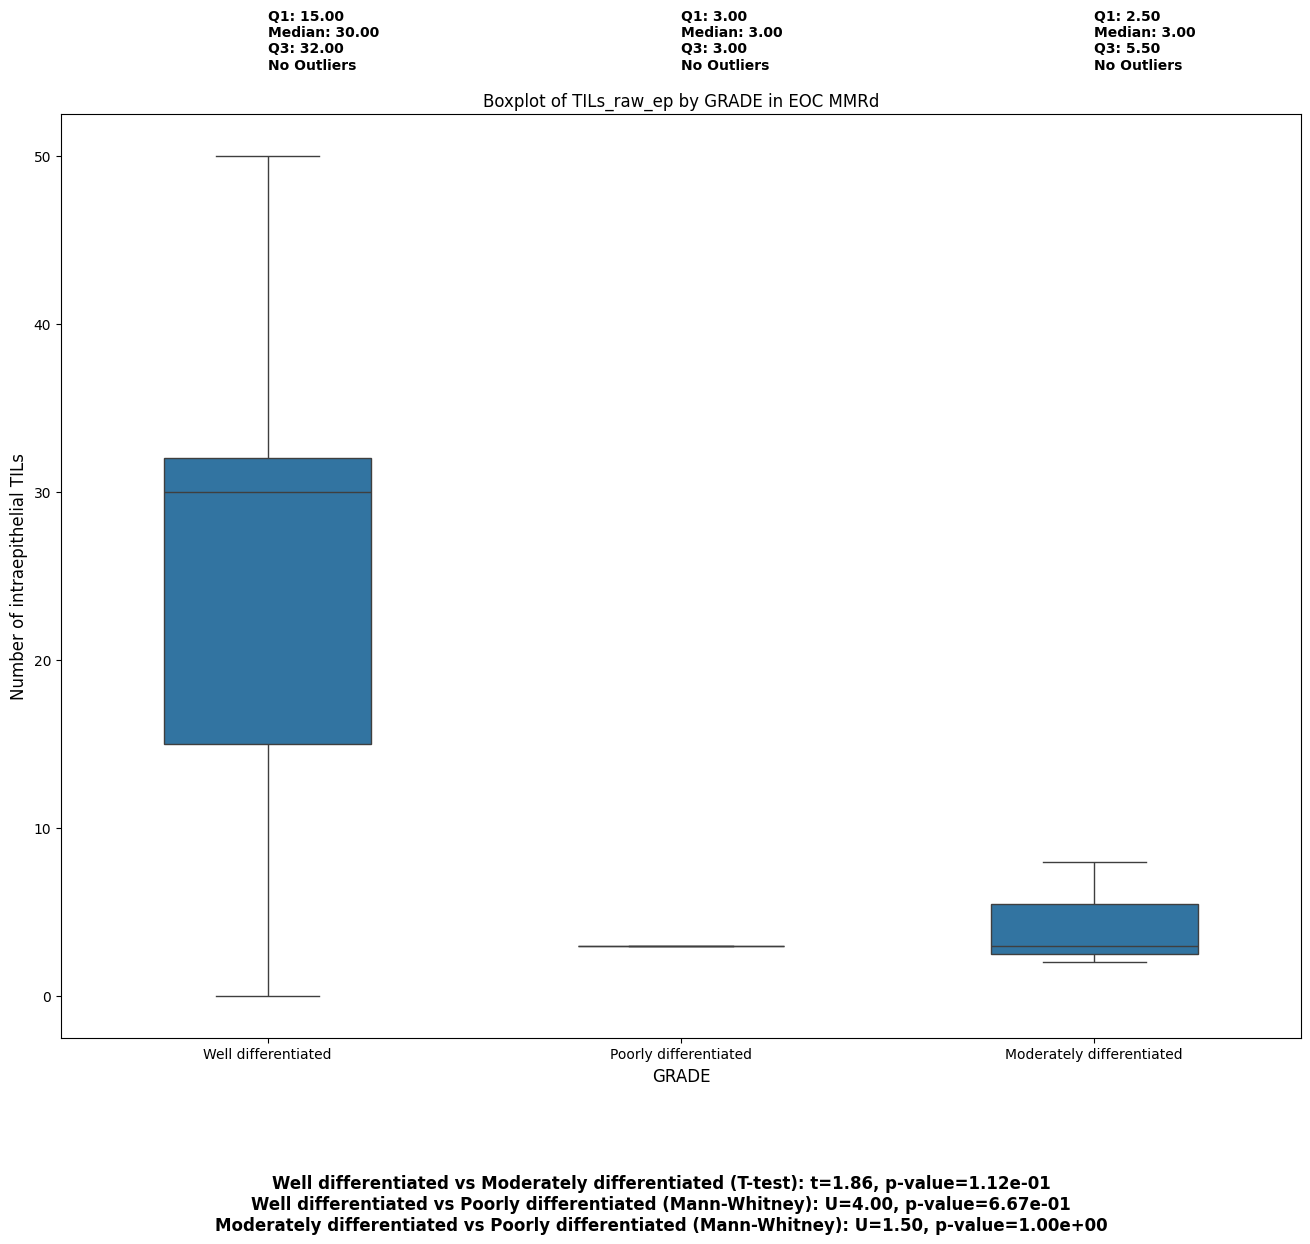

In [37]:
# Uncomment to import the libraries if not done previously 
# import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

def analyze_and_plot(df, output_folder, output_file):
    # Filter out rows with NaN values in the GRADE column
    df = df[df['GRADE'].notna()]
    # Dictionary to store outlier statistics
    outliers_dict = {}
    
    sample_counts = df['GRADE'].value_counts().to_dict()
    print(f"Number of samples in each category:")
    for category, count in sample_counts.items():
        print(f"{category}: {count}")
    # Create a figure for the boxplot
    plt.figure(figsize=(16, 12))  # Increased size for better visibility
    sns.boxplot(x='GRADE', y='TILs_raw_ep', data=df, width=0.5)  # Adjust the width of the boxes
    
    # Variables to store data for each grade category
    tils_grade_well = []
    tils_grade_moderate = []
    tils_grade_poor = []

    for category in df['GRADE'].unique():
        # Filter data for the current category
        category_data = df[df['GRADE'] == category]

        # Calculate Q1, Q3, and median
        Q1 = category_data['TILs_raw_ep'].quantile(0.25)
        Q3 = category_data['TILs_raw_ep'].quantile(0.75)
        median = category_data['TILs_raw_ep'].median()
        IQR = Q3 - Q1
        
        # Define limits for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = category_data[(category_data['TILs_raw_ep'] < lower_bound) | 
                                 (category_data['TILs_raw_ep'] > upper_bound)]
        
        # Store outlier IDs and values
        outliers_dict[category] = {
            'Outlier_IDs': outliers['ID_CNIO'].tolist(),
            'Outlier_Values': outliers['TILs_raw_ep'].tolist(),
            'Q1': Q1,
            'Q3': Q3,
            'Median': median
        }
        
        # Add data to the corresponding lists
        if category == 'Well differentiated':
            tils_grade_well = category_data['TILs_raw_ep'].astype(float).dropna()
        elif category == 'Moderately differentiated':
            tils_grade_moderate = category_data['TILs_raw_ep'].astype(float).dropna()
        elif category == 'Poorly differentiated':
            tils_grade_poor = category_data['TILs_raw_ep'].astype(float).dropna()

    # Perform statistical tests
    # Combine lists for pairwise comparisons
    groups = {
        'Well differentiated': tils_grade_well,
        'Moderately differentiated': tils_grade_moderate,
        'Poorly differentiated': tils_grade_poor
    }

    test_results = {}
    categories = list(groups.keys())

    for i in range(len(categories)):
        for j in range(i + 1, len(categories)):
            cat_a = categories[i]
            cat_b = categories[j]
            data_a = groups[cat_a]
            data_b = groups[cat_b]

            if not data_a.empty and not data_b.empty:
                # Shapiro-Wilk normality test
                shapiro_a = shapiro(data_a)
                shapiro_b = shapiro(data_b)
                
                # Levene's test for homogeneity of variances
                levene_test = levene(data_a, data_b)
                
                # Select the appropriate test
                if shapiro_a.pvalue > 0.05 and shapiro_b.pvalue > 0.05 and levene_test.pvalue > 0.05:
                    # T-test
                    t_test = ttest_ind(data_a, data_b)
                    test_results[f"{cat_a} vs {cat_b} (T-test)"] = f"t={t_test.statistic:.2f}, p-value={t_test.pvalue:.2e}"
                else:
                    # Mann-Whitney U test
                    mannwhitney_test = mannwhitneyu(data_a, data_b, alternative='two-sided')
                    test_results[f"{cat_a} vs {cat_b} (Mann-Whitney)"] = f"U={mannwhitney_test.statistic:.2f}, p-value={mannwhitney_test.pvalue:.2e}"

    # Add the test results as text below the plot
    text_results = "\n".join([f"{comparison}: {result}" for comparison, result in test_results.items()])
    plt.figtext(0.5, -0.05, text_results, horizontalalignment='center', fontsize=12, color='black', weight='bold', ha='center')

    # Add text with outliers, Q1, Q3, and Median
    for category, stats in outliers_dict.items():
        sorted_outliers = sorted(zip(stats['Outlier_IDs'], stats['Outlier_Values']), key=lambda x: x[1])
        outlier_text = 'Outliers:\n' + '\n'.join([f'{id_}: {val:.2f}' for id_, val in sorted_outliers]) if stats['Outlier_Values'] else 'No Outliers'
        
        # Always include Q1, Median, and Q3 in the text box
        summary_stats_text = f"Q1: {stats['Q1']:.2f}\nMedian: {stats['Median']:.2f}\nQ3: {stats['Q3']:.2f}\n{outlier_text}"
        
        x_pos = df['GRADE'].unique().tolist().index(category)
        plt.gca().text(
            x=x_pos, 
            y=df['TILs_raw_ep'].max() + 0.1 * (df['TILs_raw_ep'].max() - df['TILs_raw_ep'].min()), 
            s=summary_stats_text,
            horizontalalignment='left', verticalalignment='bottom', 
            fontsize=10, color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'),
            weight='bold'
        )
    
    # Set title and labels for the plot
    plt.title('Boxplot of TILs_raw_ep by GRADE in EOC MMRd', fontsize=12)
    plt.xlabel('GRADE', fontsize=12)
    plt.ylabel('Number of intraepithelial TILs', fontsize=12)
    
    # Save the plot as a PDF file
    plt.savefig(f'{output_folder}/{output_file}', format='pdf', bbox_inches='tight')
    
    # Show the plot
    plt.show()

# End of the function
# Usage
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_EOC_MMRd_TILs_raw_ep_by_GRADE.pdf'  

analyze_and_plot(df_eoc_mmrd, output_folder, output_file)


<Axes: title={'center': 'Distribution of TILs_raw_ep by grade in EOC MMRd'}, xlabel='GRADE', ylabel='TILs_raw_ep'>

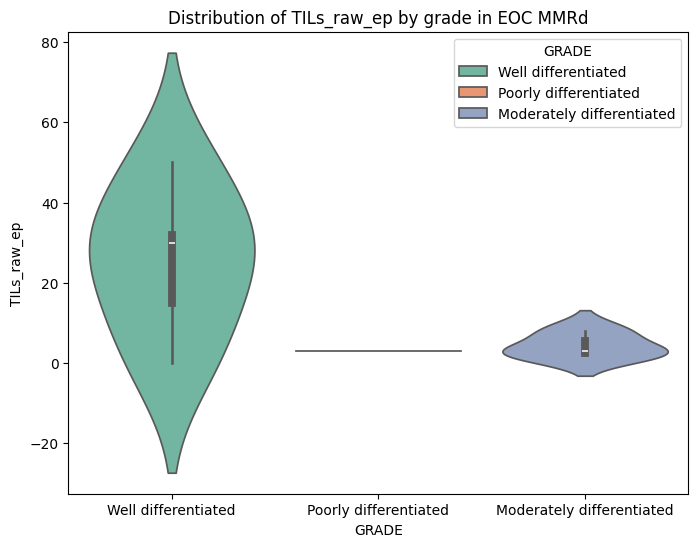

In [38]:
# Violin Plot
plt.figure(figsize=(8, 6))
# Add title and labels
plt.title('Distribution of TILs_raw_ep by grade in EOC MMRd')
sns.violinplot(x='GRADE', y='TILs_raw_ep', data=df_eoc_mmrd, hue='GRADE', palette='Set2')

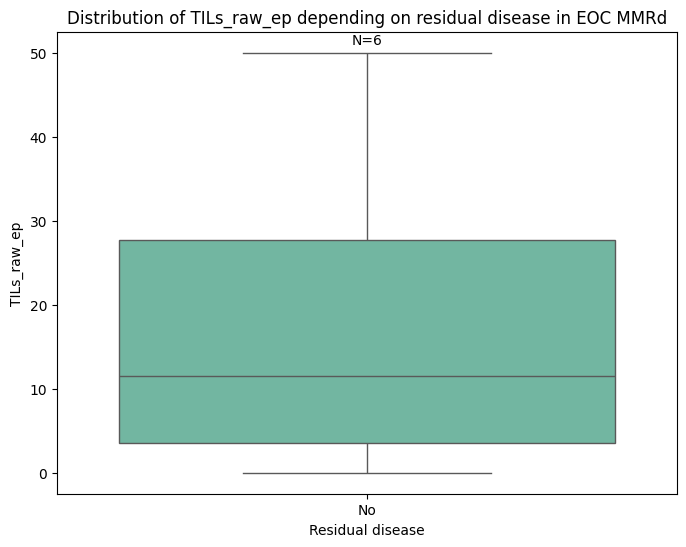

In [51]:
##### EXPLORE RELATIONSHIP BETWEEN RESIDUALa AND TILs_raw_ep in EOC MMRd #############

# Create a boxplot to visualize the distribution of TILs_raw_ep
plt.figure(figsize=(8, 6))
sns.boxplot(x='RESIDUALa', y='TILs_raw_ep', data=df_eoc_mmrd, hue='RESIDUALa', palette='Set2',legend=False)

# Count the number of samples in each category
category_counts = df_eoc_mmrd['RESIDUALa'].value_counts()

# Add title and labels
plt.title('Distribution of TILs_raw_ep depending on residual disease in EOC MMRd')
plt.xlabel('Residual disease')
plt.ylabel('TILs_raw_ep')

# Annotate the number of samples on the boxplot
for i, (res, count) in enumerate(category_counts.items()):
    plt.text(i, df_eoc_mmrd['TILs_raw_ep'].max() + 1, f'N={count}', 
             horizontalalignment='center', fontsize=10, color='black')
# Show the plot
plt.show()
# All EOC MMRd samples don't present residual disease

<Axes: title={'center': 'Distribution of TILs_raw_ep by residual in EOC MMRd'}, xlabel='RESIDUALa', ylabel='TILs_raw_ep'>

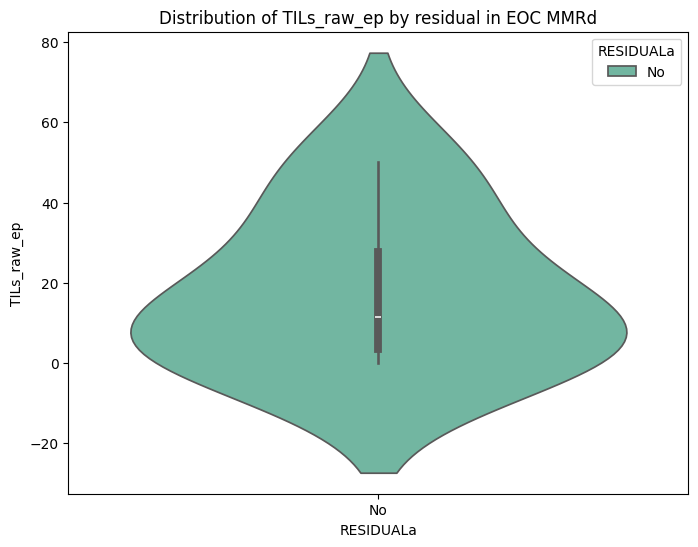

In [39]:
# Violin plot
plt.figure(figsize=(8, 6))
# Add title and labels
plt.title('Distribution of TILs_raw_ep by residual in EOC MMRd')
sns.violinplot(x='RESIDUALa', y='TILs_raw_ep', data=df_eoc_mmrd, hue='RESIDUALa', palette='Set2')